In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as sio
import copy
from evaluations import IGDC
"""
plt.rcParams.update({
                    "text.usetex": True,
                    'font.size' : 14,
                    'font.family' : 'serif',
                    'font.serif'  : 'Times New Roman'})"""

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

'\nplt.rcParams.update({\n                    "text.usetex": True,\n                    \'font.size\' : 14,\n                    \'font.family\' : \'serif\',\n                    \'font.serif\'  : \'Times New Roman\'})'

# 1) LastFM

In [2]:
path1 = "data/LastFM/"
path2 = "results/New/LastFM/"

A = sio.loadmat(path1+'LastFM.mat')['A'].toarray()
F0 = sio.loadmat(path1+'LastFM.mat')['F'].flatten()
F =np.unique(F0, return_inverse=True)[1]
print(A)
print(F)
print(np.shape(A), np.shape(F))

F_lastFM = copy.deepcopy(F)

all_in_one = np.ones(len(F_lastFM))
uniqe_vals, count = np.unique(F_lastFM, return_counts=True)
lastFM_balance = min(count) / max(count)
print("Dataset balance = ", lastFM_balance)

all_competitor = pd.read_csv(path2 + "LastFM.csv")
fair_nmf = pd.read_csv(path2 + "LastFM_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [lastFM_balance for i in range(len(k))]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 1 5 ... 3 0 5]
(5576, 5576) (5576,)
Dataset balance =  0.3302812295618051


## 1.1. Comparisons on $Q ~~ \text{and} ~~Balance$

'\n# Give plot a gray background like ggplot.\nfor i in range(2):\n    axis[i].set_xticks(k)\n    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight=\'bold\')\n    axis[i].set_facecolor(\'#EEEEEE\') #EBEBEB\n    # Style the grid.\n    axis[i].grid(which=\'major\', color=\'white\', linewidth=1.2)\n    axis[i].grid(which=\'minor\', color=\'white\', linewidth=0.6)\n\n    axis[i].set_title("LastFM-Net (Country)", fontsize=20)\n    axis[i].tick_params(axis=\'both\', labelsize=14)\n\naxis[0].set_ylabel("Modularity", fontsize=14, fontweight=\'bold\')\naxis[1].set_ylabel("Balance", fontsize=14, fontweight=\'bold\')\n\nfigure.tight_layout()\n#plt.legend(loc="best", ncol=1, fontsize=14)\n\nplt.savefig("LastFM_new_plots.svg", format=\'svg\')\nplt.show()\n'

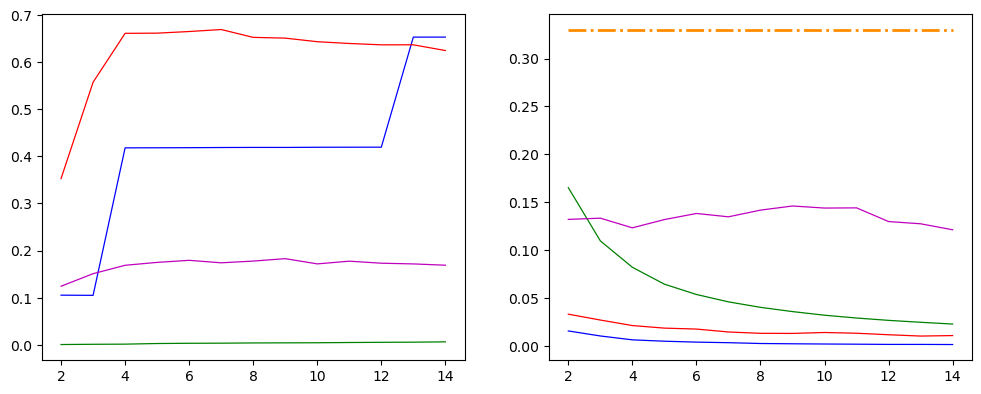

In [3]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend 
styles = ["-b", "-r", "-g", "-m", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='Fair_SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='Fair_SNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='Fair_SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='Fair_SNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

"""
# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("LastFM-Net (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("LastFM_new_plots.svg", format='svg')
plt.show()
"""

## 1.2. Pareto Analysis and IGDC calculations

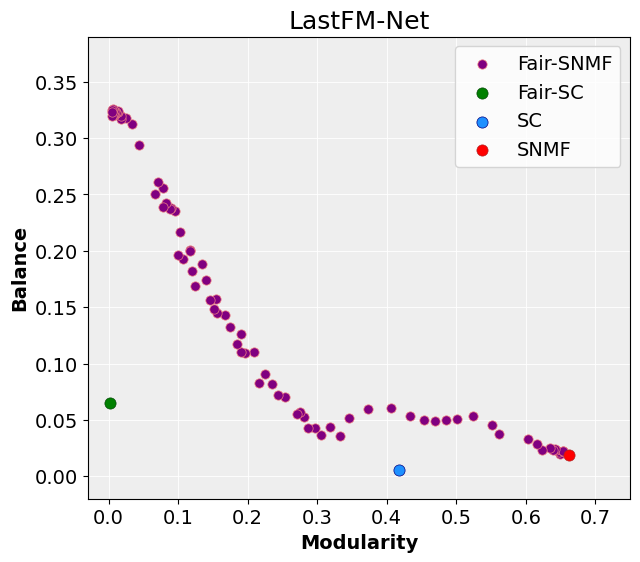

Average IGDC:
Fair_NMF: 1.1599757648136617
NMF: 1.0379710018296298
Fair_SC: 1.3674551837191264
SC: 1.152542380746959
Minimum IGDC:
Fair_NMF: 1.0370010007009598
NMF: 1.0379710018296298
Fair_SC: 1.3674551837191264
SC: 1.152542380746959
  network     attr       method  clusters (k)  avg-IGDC  min-IGDC
0  LastFM  Country     fair_nmf             5  1.159976  1.037001
1  LastFM  Country      fair_sc             5  1.367455  1.367455
2  LastFM  Country  vanilla_nmf             5  1.037971  1.037971
3  LastFM  Country   vanilla_sc             5  1.152542  1.152542


network     attr       method  clusters (k)  avg-IGDC  min-IGDC
0  LastFM  Country     fair_nmf             5  1.159976  1.037001
1  LastFM  Country      fair_sc             5  1.367455  1.367455
2  LastFM  Country  vanilla_nmf             5  1.037971  1.037971
3  LastFM  Country   vanilla_sc             5  1.152542  1.152542

In [493]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"LastFM-Net", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='Fair-SNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='Fair-SC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.75)
plt.ylim(-0.02, 0.39)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_LastFM.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["LastFM" for i in range(4)]
col2 = ["Country" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_LastFM_.csv', index=False)


## 1.3. Parameter ($\lambda$) analysis

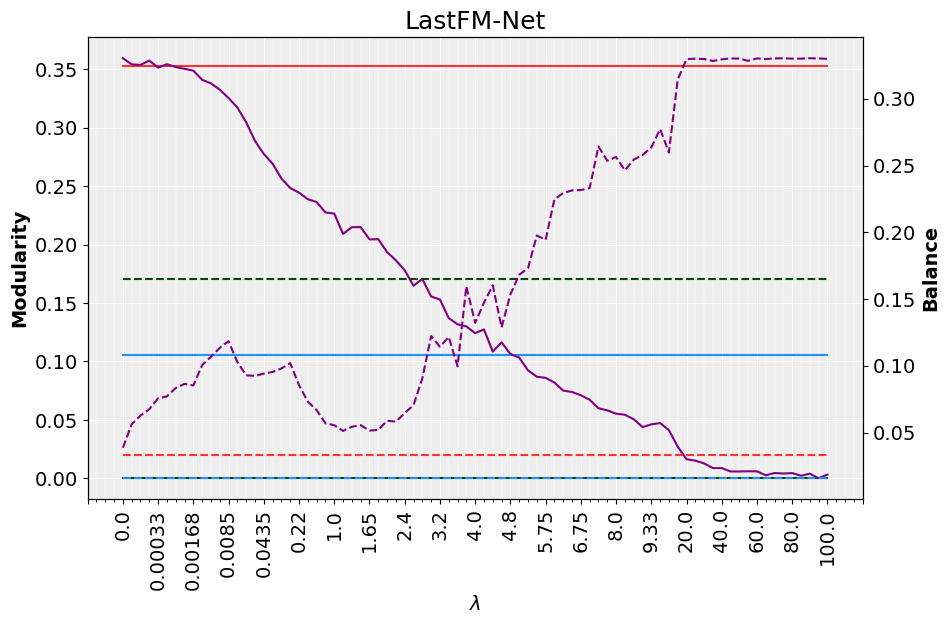

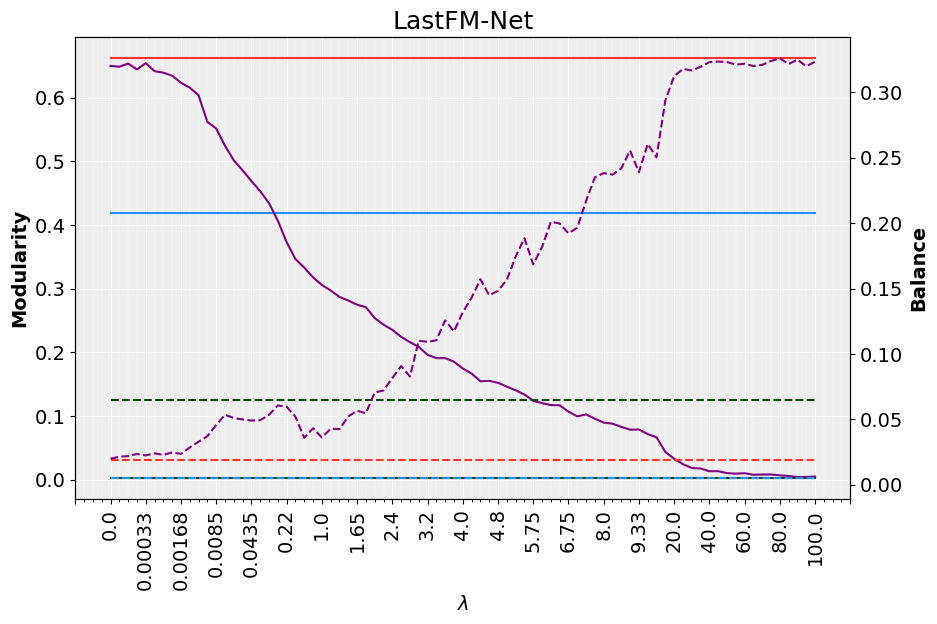

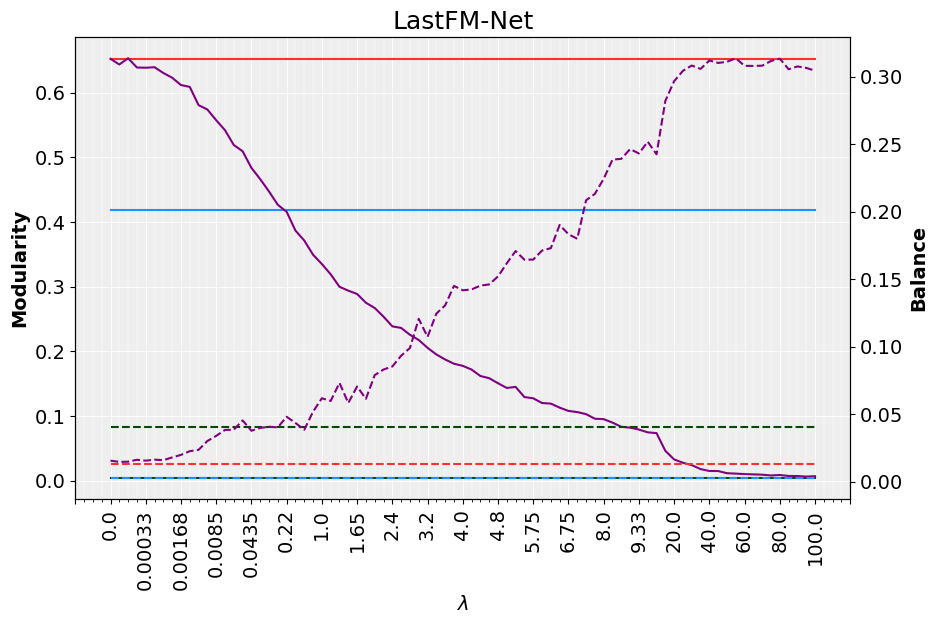

In [463]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"LastFM-Net", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("LastFM_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()


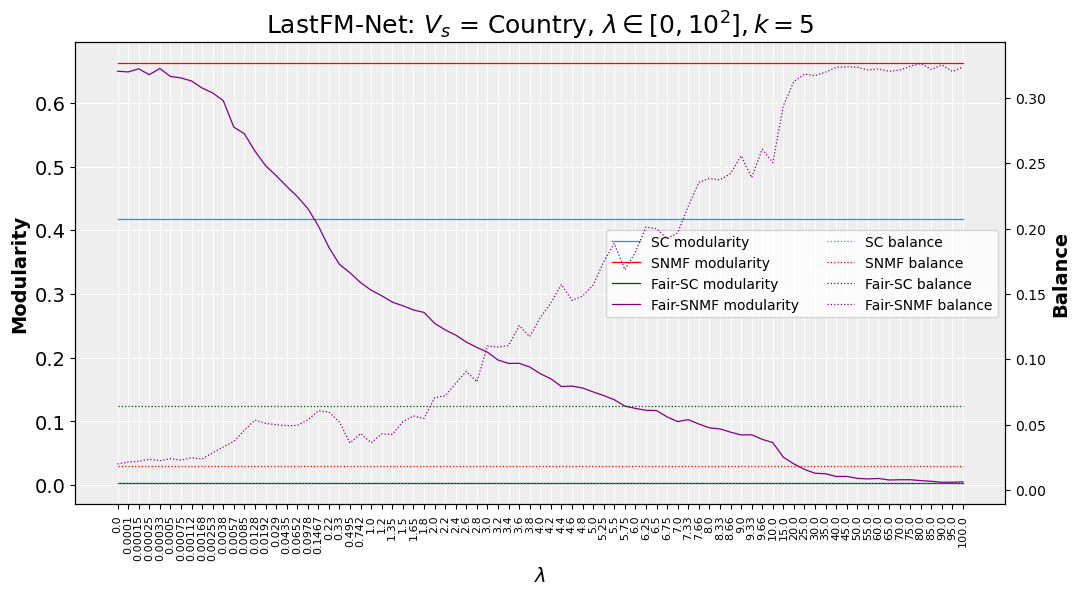

In [58]:
num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==2):
    ind = 0
elif(num_c==8):
    ind = 6
    
fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

x = np.arange(0, len(lam), 1)
tick_labs, ticks = [],[]
for i in x:
    if (np.mod(i,4)==0):
        tick_labs.append(lam[i])
        ticks.append(i)

figure, axis = plt.subplots(figsize=(12, 6))

axis.set_facecolor('#EEEEEE') #EBEBEB

sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

axis2=axis.twinx()

p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=0.9, c = "dodgerblue")
p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=0.9, c = "r")
p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=0.9, c = "#054907")
p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=0.9, c = "purple")

p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=0.9, linestyle = ":", c = "dodgerblue")
p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=0.9, linestyle = ":", c = "r")
p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=0.9, linestyle = ":", c = "#054907")
p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=0.9, linestyle = ":", c = "purple")

axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

axis.set_xticks(x)
axis.set_xticklabels(lam, rotation=90, fontsize = 8)

# added these three lines for aggregated legend 
plots = p1+p2+p3+p4+p5+p6+p7+p8
labels = [l.get_label() for l in plots]
axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
#plt.savefig("pareto_LastFM.svg", format='svg')
plt.show()


# 2) DrugNET_ethnicity

In [494]:
path1 = "data/DrugNet/CSV/"
path2 = "results/New/DrugNet/"

DrugNet_ethnicity_balance =  0.13761467889908258
DrugNet_gender_balance =     0.2671232876712329

all_competitor = pd.read_csv(path2 + "DrugNET_ethnicity.csv")
fair_nmf = pd.read_csv(path2 + "DrugNET_ethnicity_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [DrugNet_ethnicity_balance for i in range(len(k))]

## 2.1. Comparisons on $Q ~~ \text{and} ~~Balance$

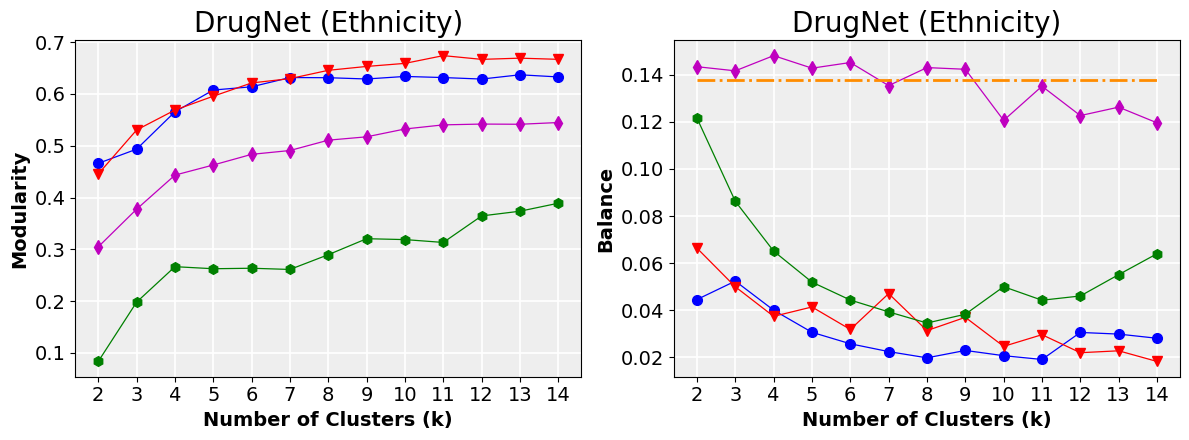

In [495]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("DrugNet (Ethnicity)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("DrugNet_ethnicity_new_plots.svg", format='svg')
plt.show()

## 2.2. Parameter ($\lambda$) analysis

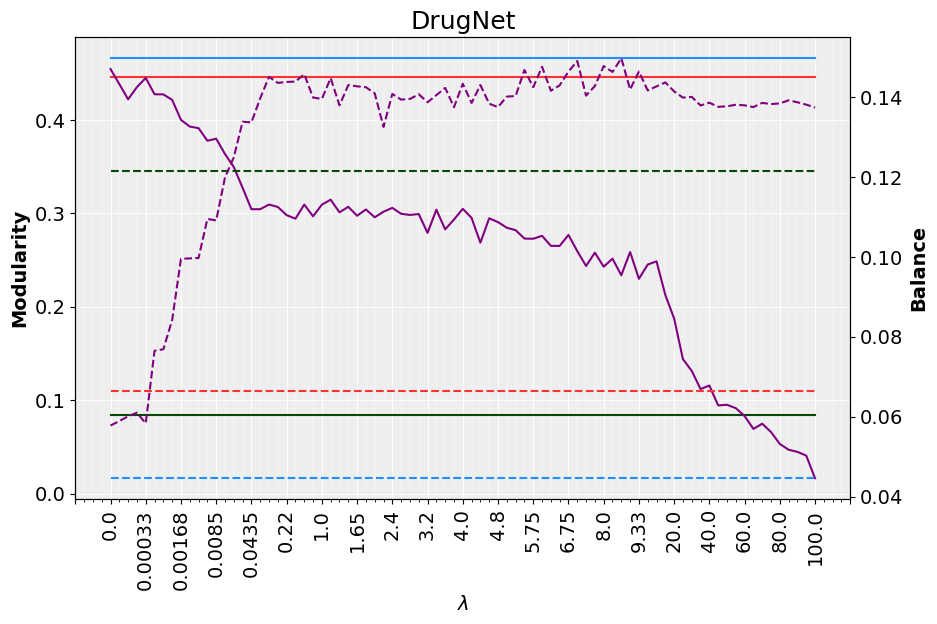

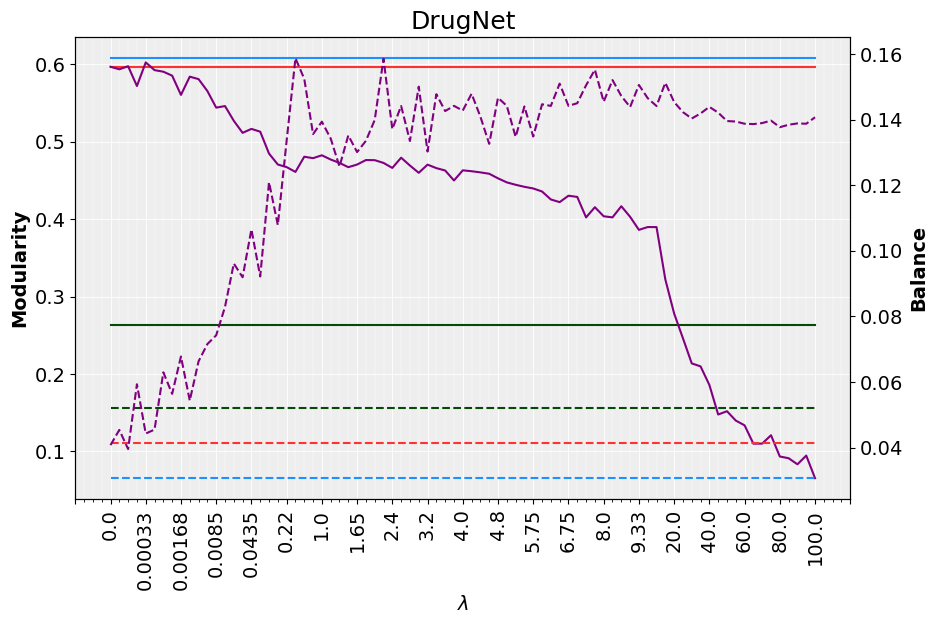

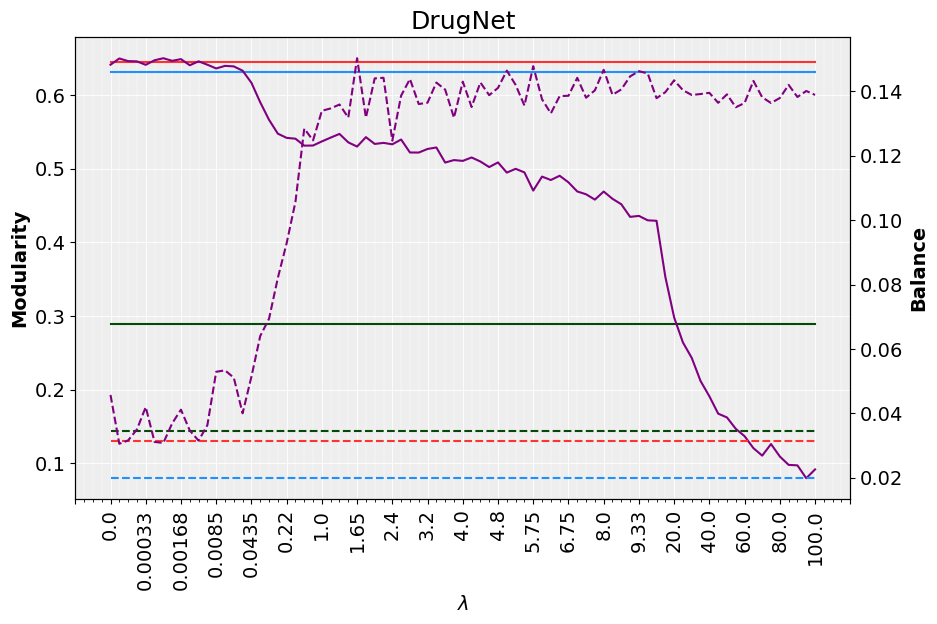

In [466]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"DrugNet", fontsize=18)
    #axis.set_title(r"DrugNet: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("DrugNet_ethnicity_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()


## 2.3. Pareto Analysis and IGDC calculations

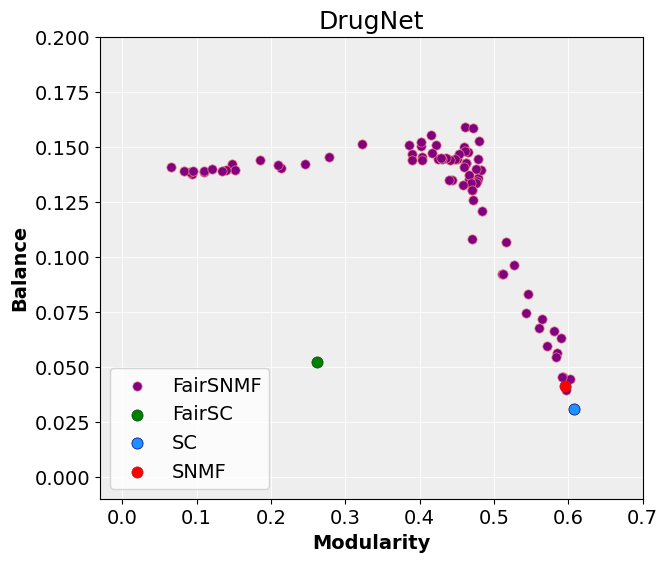

Average IGDC:
Fair_NMF: 1.0639982169931659
NMF: 1.0403721158443031
Fair_SC: 1.201031528482263
SC: 1.0457654302486512
Minimum IGDC:
Fair_NMF: 0.9931457593553336
NMF: 1.0403721158443031
Fair_SC: 1.201031528482263
SC: 1.0457654302486512
   network       attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Ethnicity     fair_nmf             5  1.063998  0.993146
1  DrugNet  Ethnicity      fair_sc             5  1.201032  1.201032
2  DrugNet  Ethnicity  vanilla_nmf             5  1.040372  1.040372
3  DrugNet  Ethnicity   vanilla_sc             5  1.045765  1.045765


network       attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Ethnicity     fair_nmf             5  1.063998  0.993146
1  DrugNet  Ethnicity      fair_sc             5  1.201032  1.201032
2  DrugNet  Ethnicity  vanilla_nmf             5  1.040372  1.040372
3  DrugNet  Ethnicity   vanilla_sc             5  1.045765  1.045765

In [500]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"DrugNet: $V_s$ = Ethnicity, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"DrugNet", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.7)
plt.ylim(-0.01, 0.2)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_DrugNet_ethnicity.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["DrugNet" for i in range(4)]
col2 = ["Ethnicity" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_DrugNet_ethnicity_.csv', index=False)


# 3) DrugNET_gender

In [253]:
path1 = "data/DrugNet/CSV/"
path2 = "results/New/DrugNet/"

DrugNet_ethnicity_balance =  0.13761467889908258
DrugNet_gender_balance =     0.2671232876712329

all_competitor = pd.read_csv(path2 + "DrugNET_gender.csv")
fair_nmf = pd.read_csv(path2 + "DrugNET_gender_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [DrugNet_gender_balance for i in range(len(k))]

## 3.1. Comparisons on $Q ~~ \text{and} ~~Balance$

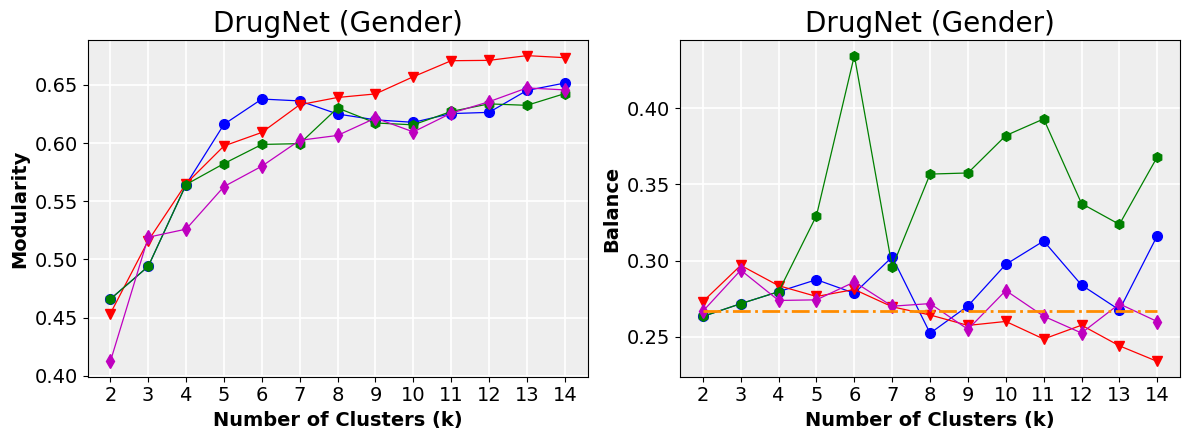

In [254]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("DrugNet (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("DrugNet_gender_new_plots.svg", format='svg')
plt.show()

## 3.2. Parameter ($\lambda$) analysis

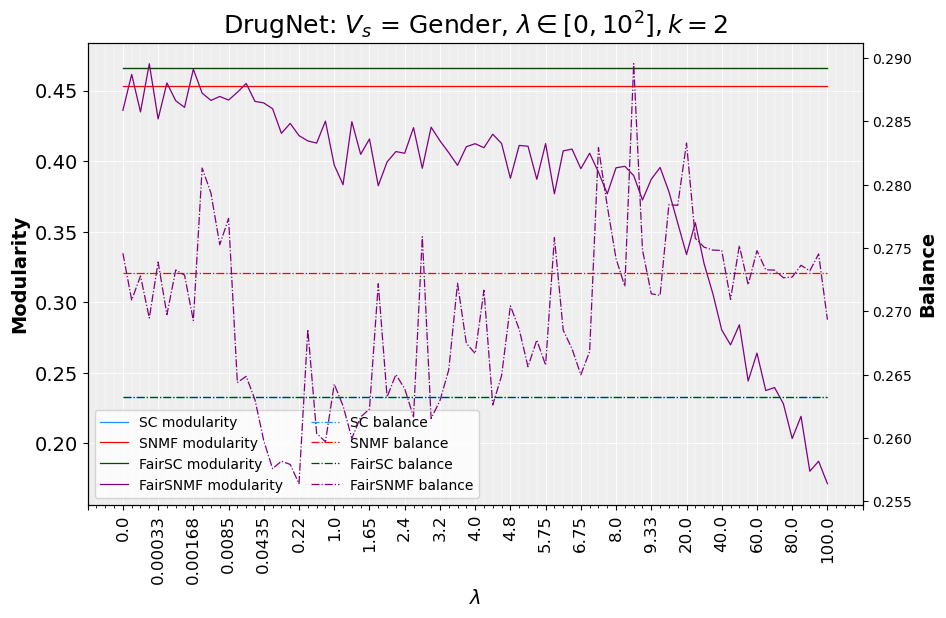

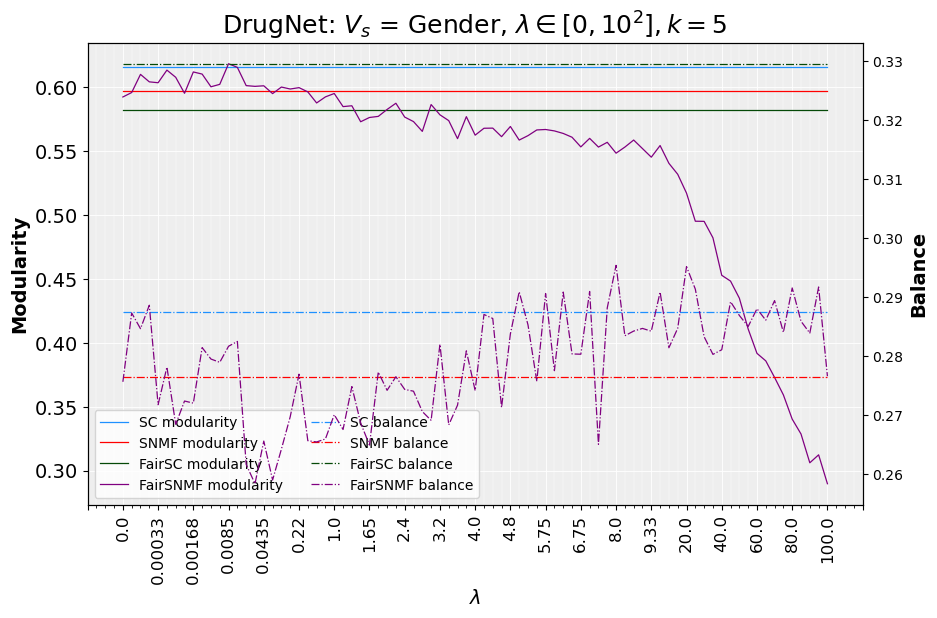

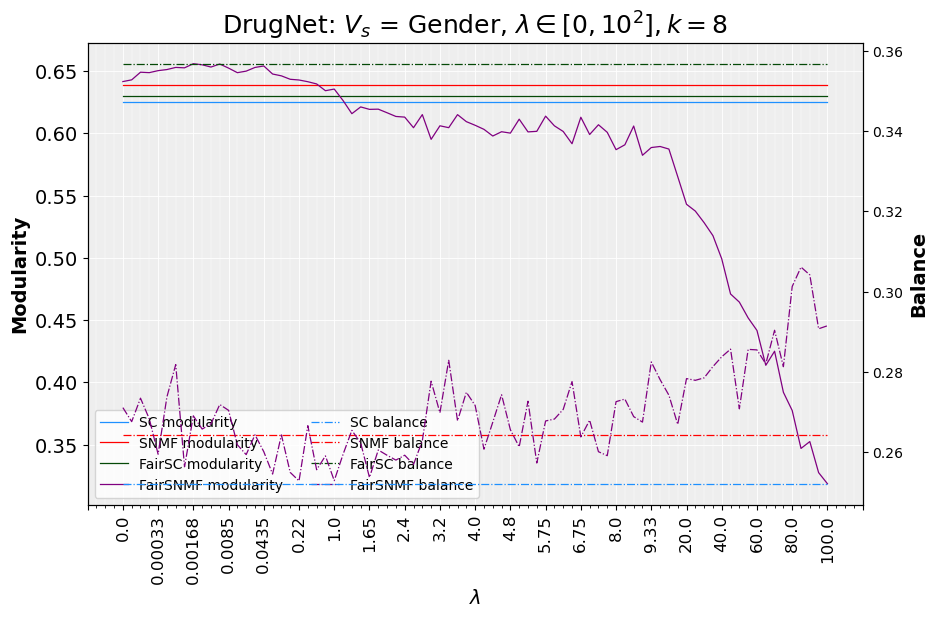

In [78]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"DrugNet: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=0.9, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=0.9, c = "r")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=0.9, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=0.9, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "r")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 12)

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("DrugNet_gender_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 3.3. Pareto Analysis and IGDC calculations

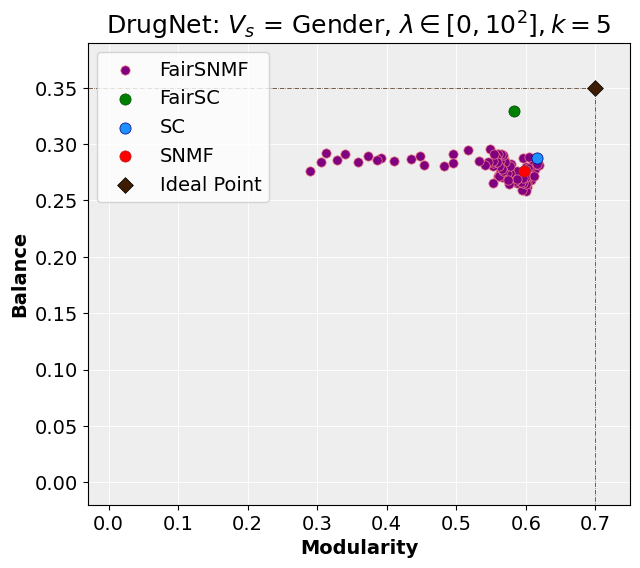

Average IGDC:
Fair_NMF: 0.17604305700809456
NMF: 0.126155907007705
Fair_SC: 0.11935782281055157
SC: 0.10462679113314681
Minimum IGDC:
Fair_NMF: 0.10629842404943707
NMF: 0.126155907007705
Fair_SC: 0.11935782281055157
SC: 0.10462679113314681
   network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Gender     fair_nmf             5  0.176043  0.106298
1  DrugNet  Gender      fair_sc             5  0.119358  0.119358
2  DrugNet  Gender  vanilla_nmf             5  0.126156  0.126156
3  DrugNet  Gender   vanilla_sc             5  0.104627  0.104627


network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Gender     fair_nmf             5  0.176043  0.106298
1  DrugNet  Gender      fair_sc             5  0.119358  0.119358
2  DrugNet  Gender  vanilla_nmf             5  0.126156  0.126156
3  DrugNet  Gender   vanilla_sc             5  0.104627  0.104627

In [79]:
ideal = np.asarray([0.70, 0.35])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"DrugNet: $V_s$ = Gender, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.75)
plt.ylim(-0.02, 0.39)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_DrugNet_gender.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["DrugNet" for i in range(4)]
col2 = ["Gender" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_DrugNet_gender_.csv', index=False)


# 4) Contact Diaries

In [467]:
path1 = "data/School/"
path2 = "results/New/School/"

Diaries_balance =  0.7647058823529411

all_competitor = pd.read_csv(path2 + "Diaries.csv")
fair_nmf = pd.read_csv(path2 + "Diaries_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Diaries_balance for i in range(len(k))]

## 4.1. Comparisons on $Q ~~ \text{and} ~~Balance$

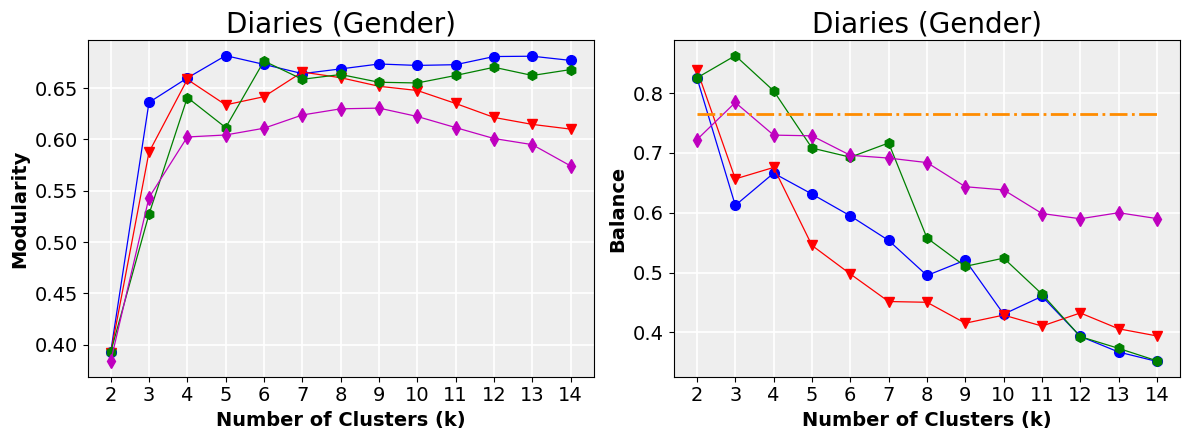

In [468]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Diaries (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Diaries_new_plots.svg", format='svg')
plt.show()

## 4.2. Parameter ($\lambda$) analysis

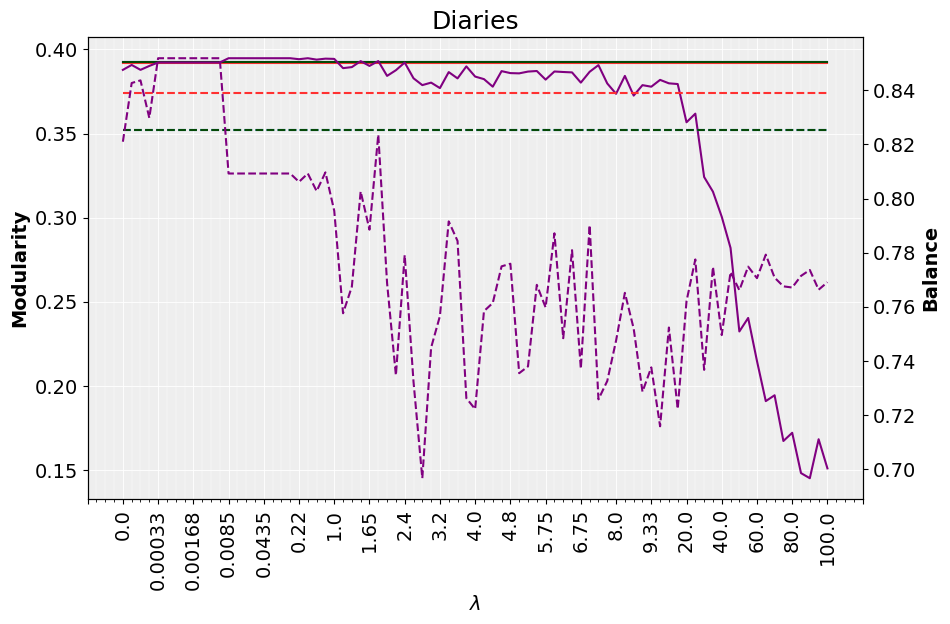

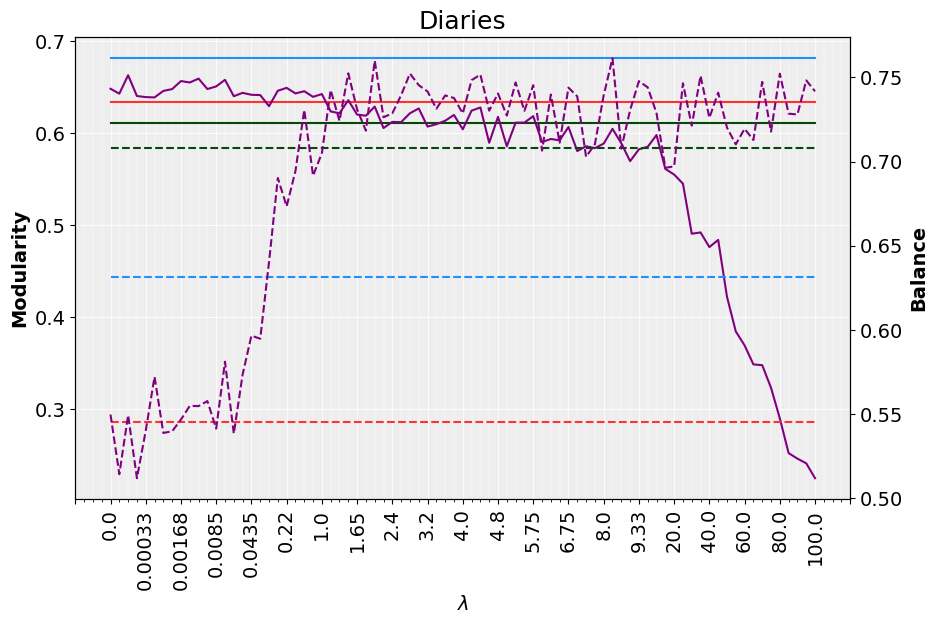

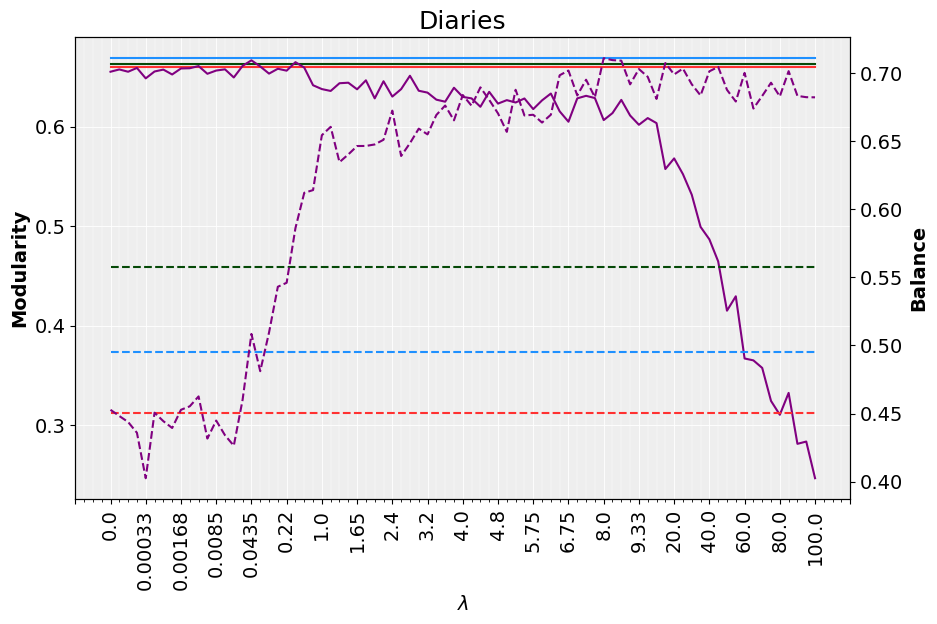

In [469]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Diaries", fontsize=18)
    #axis.set_title(r"Diaries: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Diaries_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 4.3. Pareto Analysis and IGDC calculations

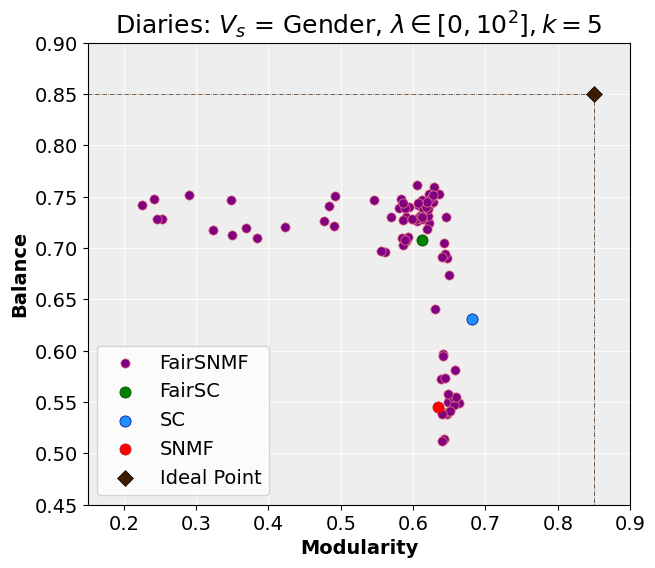

Average IGDC:
Fair_NMF: 0.3349340883670188
NMF: 0.3736048783889769
Fair_SC: 0.2774651254230483
SC: 0.2760457687337569
Minimum IGDC:
Fair_NMF: 0.23518478545518204
NMF: 0.3736048783889769
Fair_SC: 0.2774651254230483
SC: 0.2760457687337569
           network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Contact Diaries  Gender     fair_nmf             5  0.334934  0.235185
1  Contact Diaries  Gender      fair_sc             5  0.277465  0.277465
2  Contact Diaries  Gender  vanilla_nmf             5  0.373605  0.373605
3  Contact Diaries  Gender   vanilla_sc             5  0.276046  0.276046


network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Contact Diaries  Gender     fair_nmf             5  0.334934  0.235185
1  Contact Diaries  Gender      fair_sc             5  0.277465  0.277465
2  Contact Diaries  Gender  vanilla_nmf             5  0.373605  0.373605
3  Contact Diaries  Gender   vanilla_sc             5  0.276046  0.276046

In [101]:
ideal = np.asarray([0.85, 0.85])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"Diaries: $V_s$ = Gender, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.85, -0.03, 0.85 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.85, -0.03, 0.85, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(0.15, 0.90)
plt.ylim(0.45, 0.90)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Diaries.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Contact Diaries" for i in range(4)]
col2 = ["Gender" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Diaries.csv', index=False)


# 5) Facebook

In [470]:
path1 = "data/School/"
path2 = "results/New/School/"

Facebook_balance =  0.8235294117647058

all_competitor = pd.read_csv(path2 + "Facebook.csv")
fair_nmf = pd.read_csv(path2 + "Facebook_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Facebook_balance for i in range(len(k))]

## 5.1. Comparisons on $Q ~~ \text{and} ~~Balance$

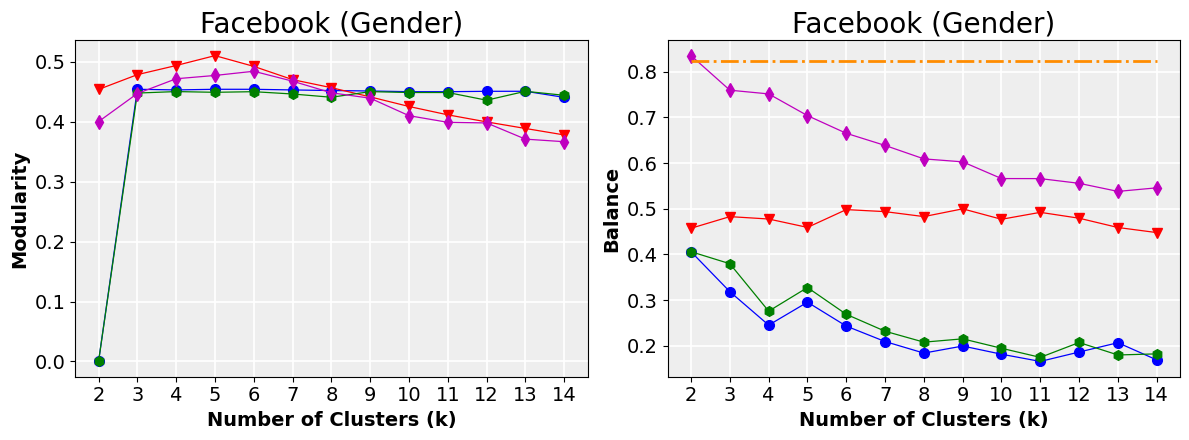

In [471]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Facebook (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Facebook_new_plots.svg", format='svg')
plt.show()

## 5.2. Parameter ($\lambda$) analysis

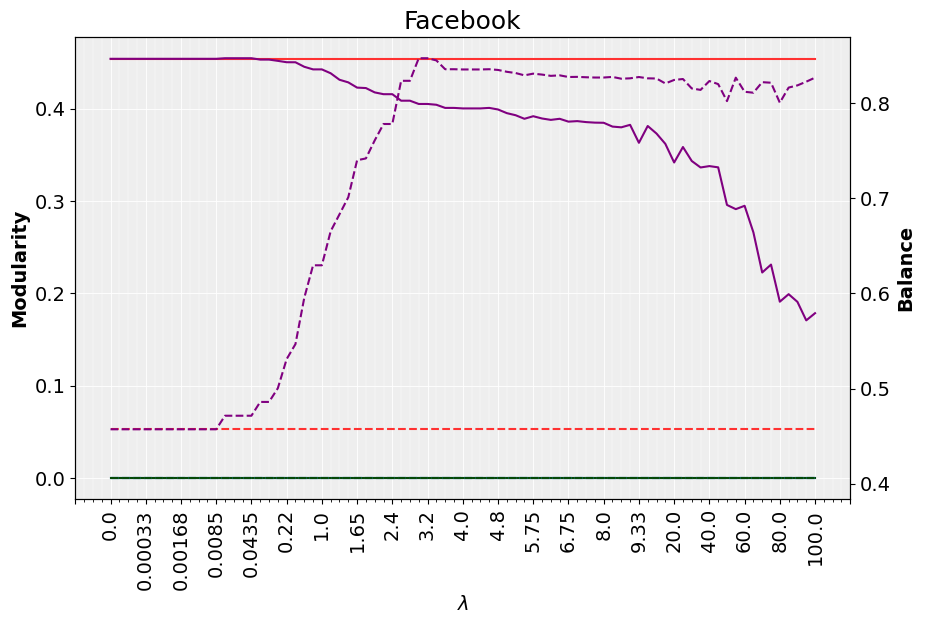

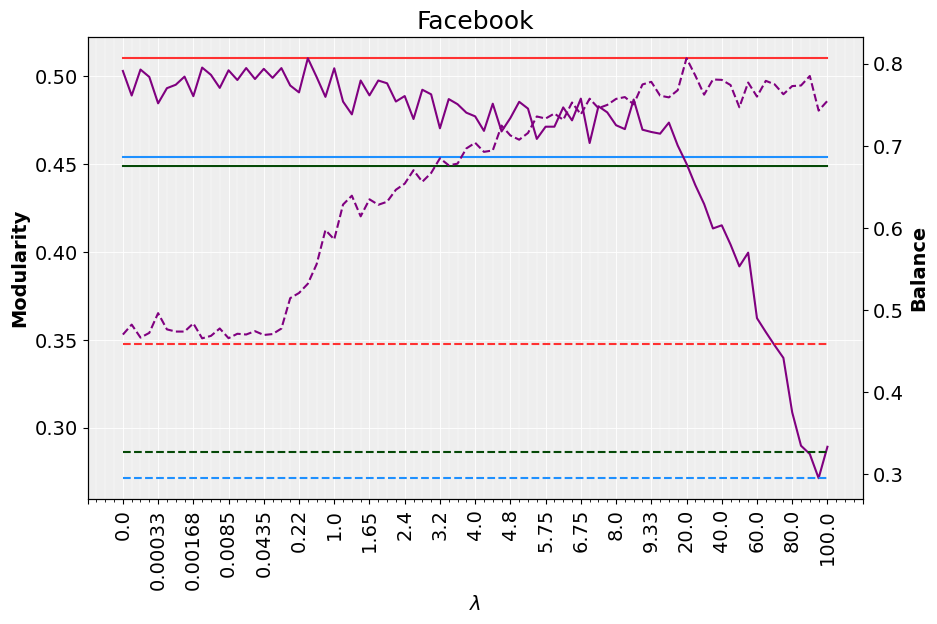

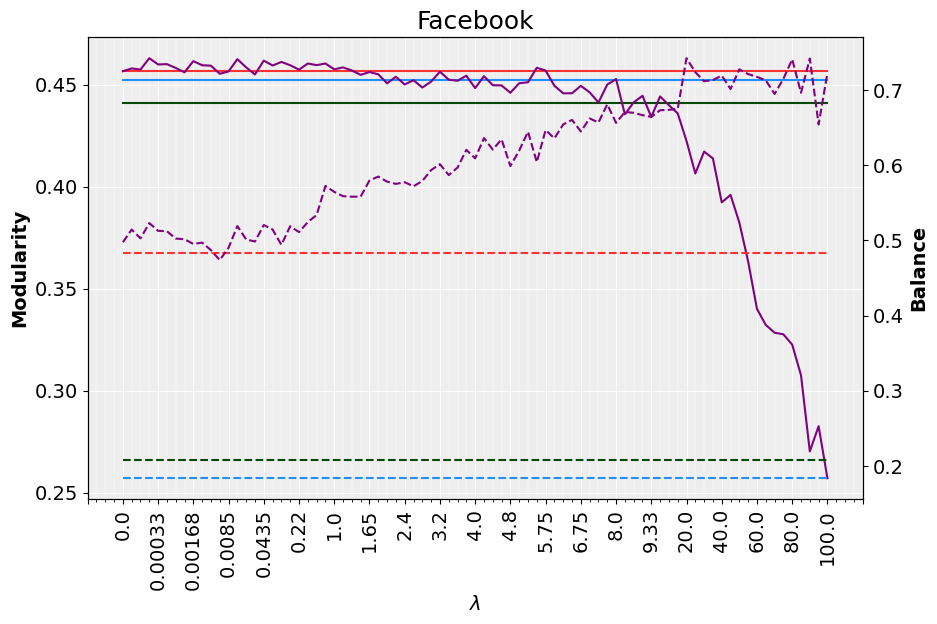

In [472]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Facebook", fontsize=18)
    #axis.set_title(r"Facebook: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Facebook_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 5.3. Pareto Analysis and IGDC calculations

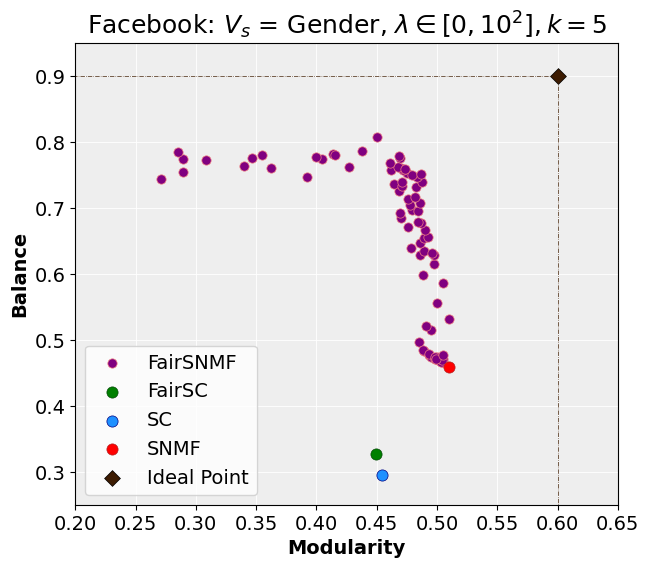

Average IGDC:
Fair_NMF: 0.2971308061248833
NMF: 0.4499270405162925
Fair_SC: 0.5920385328504543
SC: 0.6219529443869974
Minimum IGDC:
Fair_NMF: 0.17633723995454023
NMF: 0.4499270405162925
Fair_SC: 0.5920385328504543
SC: 0.6219529443869974
    network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Facebook  Gender     fair_nmf             5  0.297131  0.176337
1  Facebook  Gender      fair_sc             5  0.592039  0.592039
2  Facebook  Gender  vanilla_nmf             5  0.449927  0.449927
3  Facebook  Gender   vanilla_sc             5  0.621953  0.621953


network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Facebook  Gender     fair_nmf             5  0.297131  0.176337
1  Facebook  Gender      fair_sc             5  0.592039  0.592039
2  Facebook  Gender  vanilla_nmf             5  0.449927  0.449927
3  Facebook  Gender   vanilla_sc             5  0.621953  0.621953

In [114]:
ideal = np.asarray([0.6, 0.9])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"Facebook: $V_s$ = Gender, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.9, -0.03, 0.6 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.6, -0.03, 0.9, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(0.20, 0.65)
plt.ylim(0.25, 0.95)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Facebook.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Facebook" for i in range(4)]
col2 = ["Gender" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3, 'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Facebook.csv', index=False)


# 6) Friendship

In [473]:
path1 = "data/School/"
path2 = "results/New/School/"

Friendship_balance =  0.6710526315789473

all_competitor = pd.read_csv(path2 + "Friendship.csv")
fair_nmf = pd.read_csv(path2 + "Friendship_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Friendship_balance for i in range(len(k))]

## 6.1. Comparisons on $Q ~~ \text{and} ~~Balance$

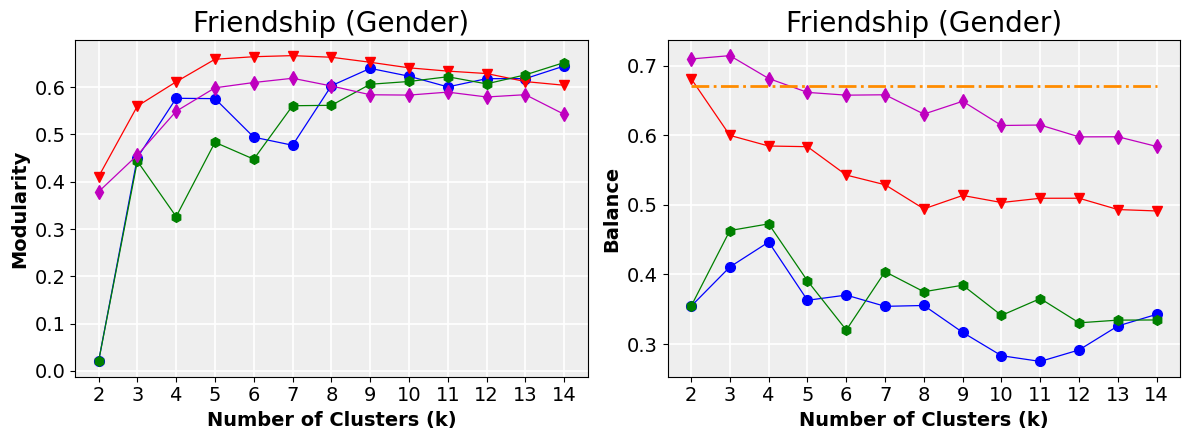

In [474]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Friendship (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Friendship_new_plots.svg", format='svg')
plt.show()

## 6.2. Parameter ($\lambda$) analysis


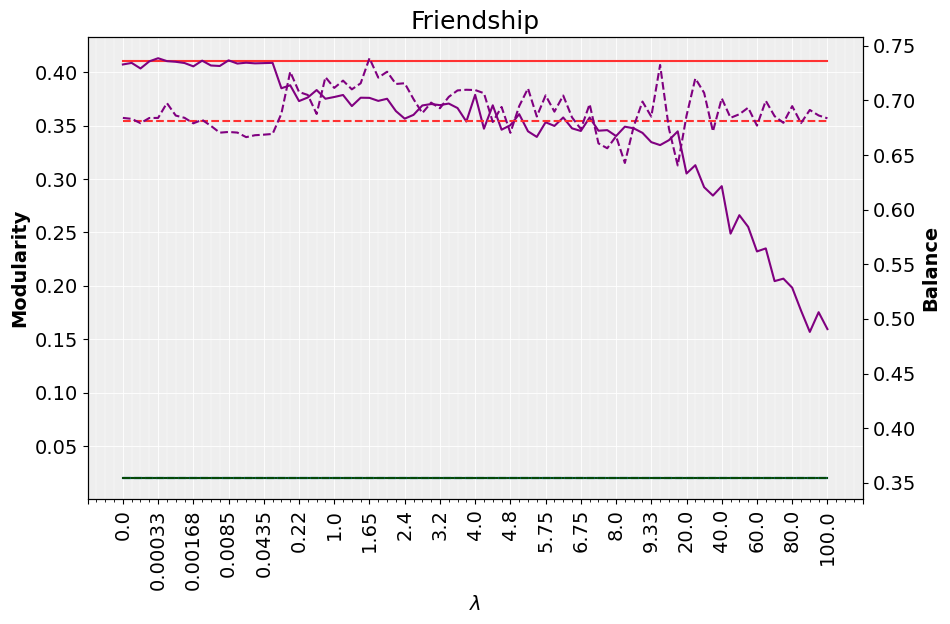

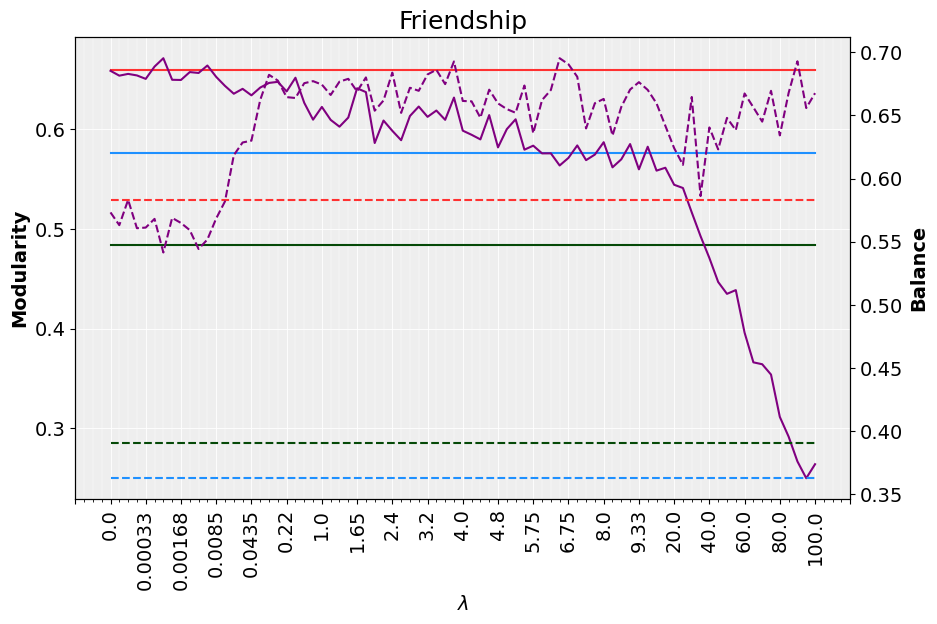

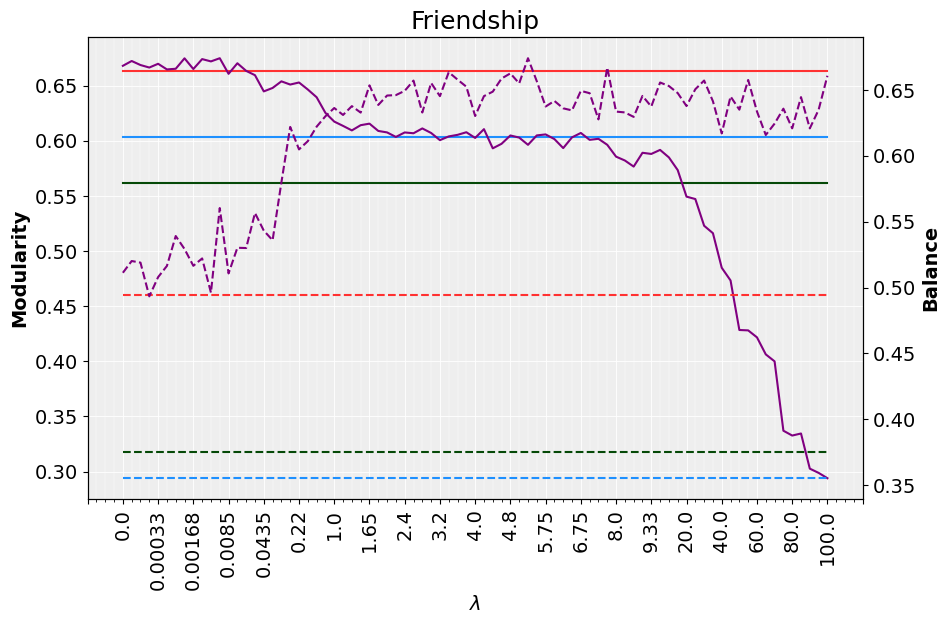

In [475]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Friendship", fontsize=18)
    #axis.set_title(r"Friendship: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Friendship_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 6.3. Pareto Analysis and IGDC calculations

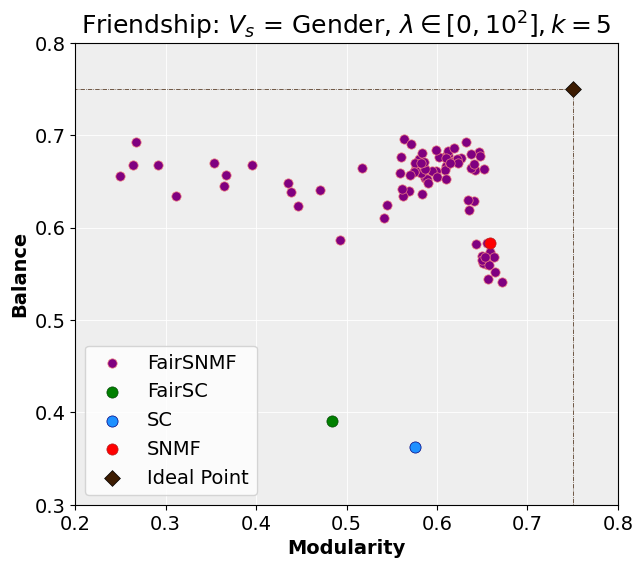

Average IGDC:
Fair_NMF: 0.21978744394053962
NMF: 0.18972566139819183
Fair_SC: 0.447367292762155
SC: 0.42455016216444036
Minimum IGDC:
Fair_NMF: 0.12363625912896128
NMF: 0.18972566139819183
Fair_SC: 0.447367292762155
SC: 0.42455016216444036
      network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Friendship  Gender     fair_nmf             5  0.219787  0.123636
1  Friendship  Gender      fair_sc             5  0.447367  0.447367
2  Friendship  Gender  vanilla_nmf             5  0.189726  0.189726
3  Friendship  Gender   vanilla_sc             5  0.424550  0.424550


network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  Friendship  Gender     fair_nmf             5  0.219787  0.123636
1  Friendship  Gender      fair_sc             5  0.447367  0.447367
2  Friendship  Gender  vanilla_nmf             5  0.189726  0.189726
3  Friendship  Gender   vanilla_sc             5  0.424550  0.424550

In [121]:
ideal = np.asarray([0.75, 0.75])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"Friendship: $V_s$ = Gender, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.75, -0.03, 0.75 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.75, -0.03, 0.75, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(0.20, 0.8)
plt.ylim(0.3, 0.8)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Friendship.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Friendship" for i in range(4)]
col2 = ["Gender" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3, 'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Friendship.csv', index=False)


# 7) NBA

In [2]:
path1 = "data/NBA/"
path2 = "results/New/NBA/"

A = (pd.read_csv(path1 + "NBAgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "NBAfeature.csv", header=None)).to_numpy()

all_in_one = np.ones(F.shape[0])
uniqe_vals, count = np.unique(F, return_counts=True)
NBA_balance = min(count)/max(count)

print(len(F), len(A))
print("Dataset balance = ", NBA_balance)

all_competitor = pd.read_csv(path2 + "NBA.csv")
fair_nmf = pd.read_csv(path2 + "NBA_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)
g_b = [NBA_balance for i in range(len(k))]

400 400
Dataset balance =  0.41843971631205673


## 7.1. Comparisons on $Q ~~ \text{and} ~~Balance$

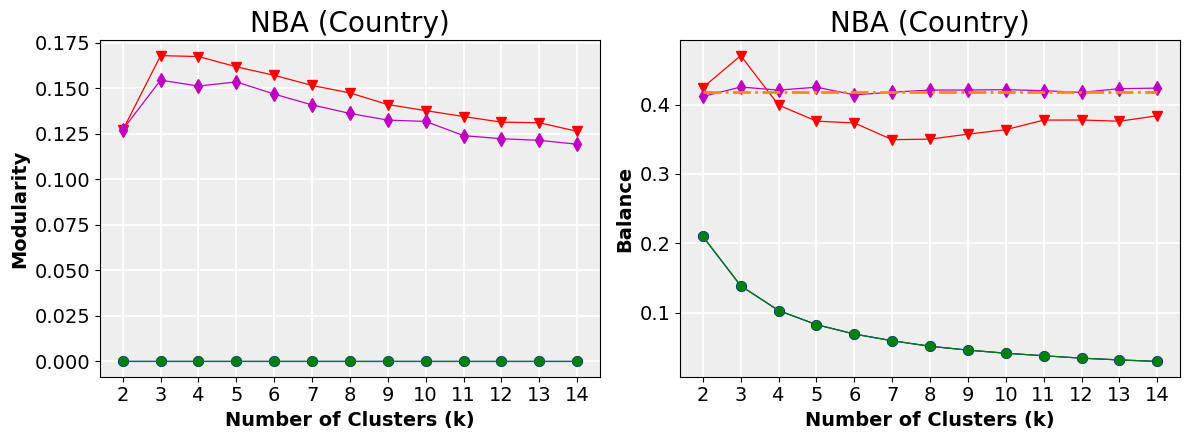

In [3]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #14,6
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("NBA (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("NBA_new_plots.svg", format='svg')
plt.show()

## 7.2. Parameter ($\lambda$) analysis

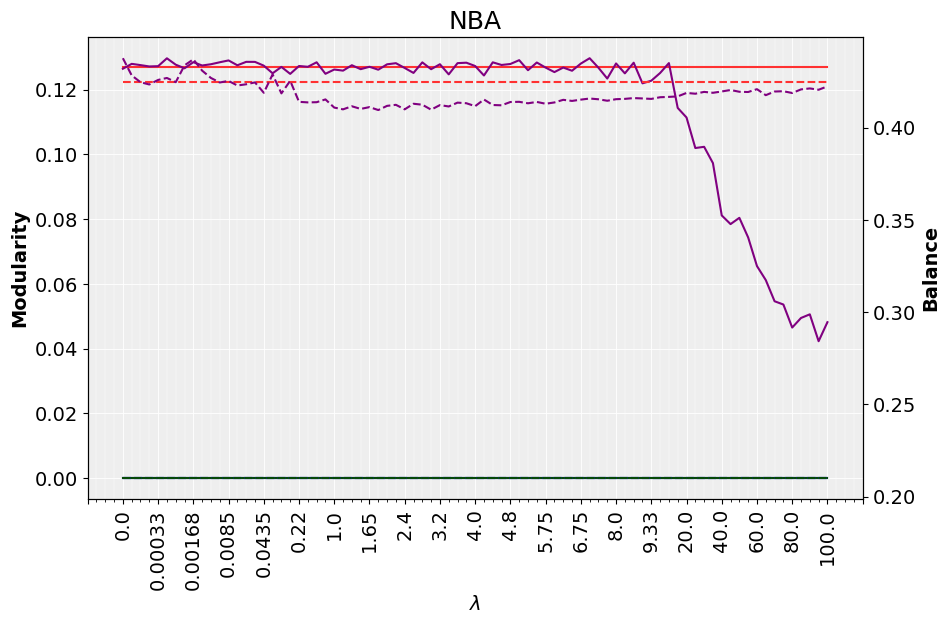

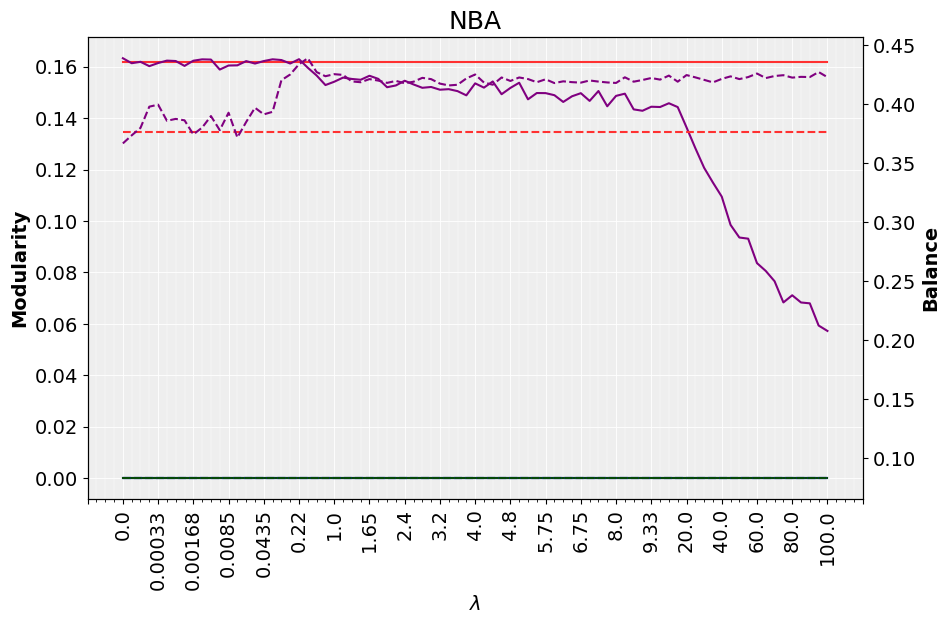

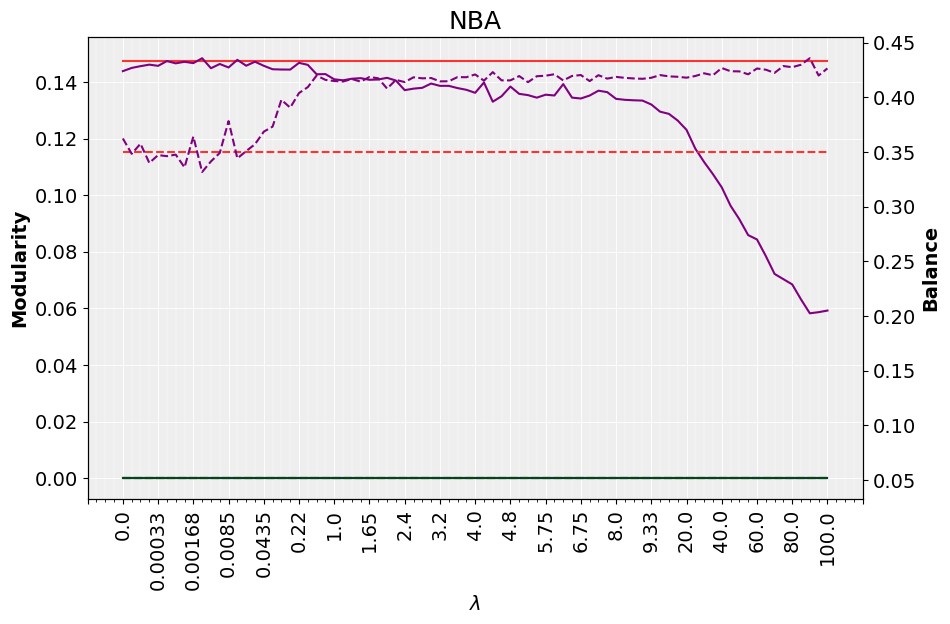

In [10]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(fnmf_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(fnmf_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(fnmf_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(fnmf_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(fnmf_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(fnmf_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"NBA", fontsize=18)
    #axis.set_title(r"NBA: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "blue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "blue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("NBA_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 7.3. Pareto Analysis and IGDC calculations

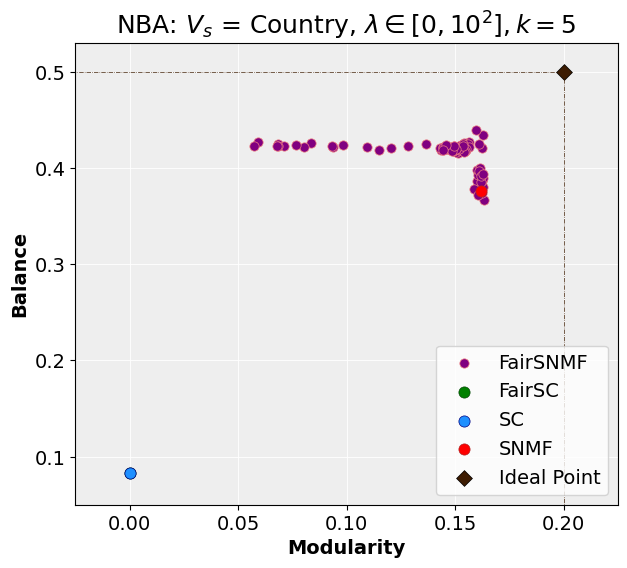

Average IGDC:
Fair_NMF: 0.108008765558943
NMF: 0.12957357286819657
Fair_SC: 0.46261022497017745
SC: 0.46261022497017745
Minimum IGDC:
Fair_NMF: 0.07327179585493727
NMF: 0.12957357286819657
Fair_SC: 0.46261022497017745
SC: 0.46261022497017745
  network               attr       method  clusters (k)  avg-IGDC  min-IGDC
0     NBA  Country of Origin     fair_nmf             5  0.108009  0.073272
1     NBA  Country of Origin      fair_sc             5  0.462610  0.462610
2     NBA  Country of Origin  vanilla_nmf             5  0.129574  0.129574
3     NBA  Country of Origin   vanilla_sc             5  0.462610  0.462610


network               attr       method  clusters (k)  avg-IGDC  min-IGDC
0     NBA  Country of Origin     fair_nmf             5  0.108009  0.073272
1     NBA  Country of Origin      fair_sc             5  0.462610  0.462610
2     NBA  Country of Origin  vanilla_nmf             5  0.129574  0.129574
3     NBA  Country of Origin   vanilla_sc             5  0.462610  0.462610

In [155]:
ideal = np.asarray([0.2, 0.5])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"NBA: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.5, -0.03, 0.2 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.2, -0.03, 0.5, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.025, 0.225)
plt.ylim(0.05, 0.53)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_NBA.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["NBA" for i in range(4)]
col2 = ["Country of Origin" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3, 'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_NBA.csv', index=False)


# 8) Table

### Modularity ($\textbf{Q}$) table 

In [172]:
path2 = "results/New/NBA/"
comp_nba = pd.read_csv(path2 + "NBA.csv")
fnmf_nba = pd.read_csv(path2 + "NBA_k_lam_gridsearch.csv")

path2 = "results/New/School/"
comp_friendship = pd.read_csv(path2 + "Friendship.csv")
fnmf_friendship = pd.read_csv(path2 + "Friendship_k_lam_gridsearch.csv")

path2 = "results/New/School/"
comp_fb = pd.read_csv(path2 + "Facebook.csv")
fnmf_fb = pd.read_csv(path2 + "Facebook_k_lam_gridsearch.csv")

path2 = "results/New/School/"
comp_diaries = pd.read_csv(path2 + "Diaries.csv")
fnmf_diaries = pd.read_csv(path2 + "Diaries_k_lam_gridsearch.csv")

path2 = "results/New/DrugNet/"
comp_drugnet = pd.read_csv(path2 + "DrugNET_ethnicity.csv")
fnmf_drugnet = pd.read_csv(path2 + "DrugNET_ethnicity_k_lam_gridsearch.csv")

path2 = "results/New/LastFM/"
comp_lastfm = pd.read_csv(path2 + "LastFM.csv")
fnmf_lastfm = pd.read_csv(path2 + "LastFM_k_lam_gridsearch.csv")

In [184]:
# NBA
fnmf_mod_nba_1 = fnmf_nba.loc[(fnmf_nba['lam'] == 1) &  (fnmf_nba['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_nba_10 = fnmf_nba.loc[(fnmf_nba['lam'] == 10) & (fnmf_nba['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_nba_1 = fnmf_nba.loc[(fnmf_nba['lam'] == 1) & (fnmf_nba['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_nba_10 = fnmf_nba.loc[(fnmf_nba['lam'] == 10) & (fnmf_nba['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_nba = (comp_nba.loc[comp_nba['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_nba = (comp_nba.loc[comp_nba['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_nba = (comp_nba.loc[comp_nba['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_nba = (comp_nba.loc[comp_nba['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_nba = (comp_nba.loc[comp_nba['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_nba = (comp_nba.loc[comp_nba['method'] == "vanilla_sc"]["average balance"].values)[3]


# Friendship
fnmf_mod_friendship_1 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1) & (fnmf_friendship['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_friendship_10 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 10) & (fnmf_friendship['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_friendship_1 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1) & (fnmf_friendship['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_friendship_10 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 10) & (fnmf_friendship['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "vanilla_sc"]["average balance"].values)[3]


# Facebook
fnmf_mod_fb_1 = fnmf_fb.loc[(fnmf_fb['lam'] == 1) & (fnmf_fb['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_fb_10 = fnmf_fb.loc[(fnmf_fb['lam'] == 10) & (fnmf_fb['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_fb_1 = fnmf_fb.loc[(fnmf_fb['lam'] == 1) & (fnmf_fb['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_fb_10 = fnmf_fb.loc[(fnmf_fb['lam'] == 10) & (fnmf_fb['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_fb = (comp_fb.loc[comp_fb['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_fb = (comp_fb.loc[comp_fb['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_fb = (comp_fb.loc[comp_fb['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_fb = (comp_fb.loc[comp_fb['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_fb = (comp_fb.loc[comp_fb['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_fb = (comp_fb.loc[comp_fb['method'] == "vanilla_sc"]["average balance"].values)[3]


# DrugNet
fnmf_mod_drugnet_1 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1) & (fnmf_drugnet['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_drugnet_10 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 10) & (fnmf_drugnet['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_drugnet_1 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1) & (fnmf_drugnet['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_drugnet_10 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 10) & (fnmf_drugnet['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "vanilla_sc"]["average balance"].values)[3]


# Contact Diaries
fnmf_mod_diaries_1 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 1) &(fnmf_diaries['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_diaries_10 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 10) & (fnmf_diaries['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_diaries_1 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 1) & (fnmf_diaries['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_diaries_10 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 10) & (fnmf_diaries['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "vanilla_sc"]["average balance"].values)[3]


# LastFM
fnmf_mod_lastfm_1 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 1) & (fnmf_lastfm['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_lastfm_10 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 10) & (fnmf_lastfm['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_bal_lastfm_1 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 1) & (fnmf_lastfm['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_lastfm_10 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 10) & (fnmf_lastfm['clusters (k)'] == 5)]["average balance"].values[0]

fsc_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "fair_sc"]["modularity"].values)[3]
nmf_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "vanilla_nmf"]["modularity"].values)[3]
sc_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "vanilla_sc"]["modularity"].values)[3]

fsc_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "fair_sc"]["average balance"].values)[3]
nmf_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "vanilla_nmf"]["average balance"].values)[3]
sc_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "vanilla_sc"]["average balance"].values)[3]

## Modularity

In [213]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [sc_mod_diaries,  sc_mod_fb,  sc_mod_friendship,  sc_mod_drugnet,  sc_mod_nba,  sc_mod_lastfm]
col3 = [fsc_mod_diaries, fsc_mod_fb, fsc_mod_friendship, fsc_mod_drugnet, fsc_mod_nba, fsc_mod_lastfm]
col4 = [nmf_mod_diaries, nmf_mod_fb, nmf_mod_friendship, nmf_mod_drugnet, nmf_mod_nba, nmf_mod_lastfm]
col5 = [fnmf_mod_diaries_1, fnmf_mod_fb_1, fnmf_mod_friendship_1, fnmf_mod_drugnet_1, fnmf_mod_nba_1, fnmf_mod_lastfm_1]
col6 = [fnmf_mod_diaries_10, fnmf_mod_fb_10, fnmf_mod_friendship_10, fnmf_mod_drugnet_10, fnmf_mod_nba_10, fnmf_mod_lastfm_10]

col_2 = [ '%.3f' % elem for elem in col2 ]
col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]
col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]

col_2[4], col_3[4] = '%.1e' %sc_mod_nba , '%.1e' %fsc_mod_nba 

results = dict()
results = {'Network':col1, 'SC':col_2, 'FairSC':col_3, 'SNMF':col_4, r'FairNM ($\lambda = 1$)':col_5, 
           r'FairNM ($\lambda = 10$)':col_6}
modularity = pd.DataFrame((results))
display(modularity)

Network        SC    FairSC   SNMF FairNM ($\lambda = 1$)  \
0  Contact Diaries     0.682     0.612  0.634                  0.643   
1         Facebook     0.454     0.449  0.510                  0.505   
2       Friendship     0.576     0.483  0.659                  0.623   
3          DrugNet     0.608     0.263  0.596                  0.482   
4              NBA  -1.4e-07  -1.4e-07  0.162                  0.154   
5           LastFM     0.418     0.003  0.662                  0.306   

  FairNM ($\lambda = 10$)  
0                   0.598  
1                   0.474  
2                   0.559  
3                   0.390  
4                   0.146  
5                   0.067

## Balance

In [214]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [sc_bal_diaries,  sc_bal_fb,  sc_bal_friendship,  sc_bal_drugnet,  sc_bal_nba,  sc_bal_lastfm]
col3 = [fsc_bal_diaries, fsc_bal_fb, fsc_bal_friendship, fsc_bal_drugnet, fsc_bal_nba, fsc_bal_lastfm]
col4 = [nmf_bal_diaries, nmf_bal_fb, nmf_bal_friendship, nmf_bal_drugnet, nmf_bal_nba, nmf_bal_lastfm]
col5 = [fnmf_bal_diaries_1, fnmf_bal_fb_1, fnmf_bal_friendship_1, fnmf_bal_drugnet_1, fnmf_bal_nba_1, fnmf_bal_lastfm_1]
col6 = [fnmf_bal_diaries_10, fnmf_bal_fb_10, fnmf_bal_friendship_10, fnmf_bal_drugnet_10, fnmf_bal_nba_10, fnmf_bal_lastfm_10]

col_2 = [ '%.3f' % elem for elem in col2 ]
col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]
col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]

col_2[4], col_3[4] = '%.1e' %sc_bal_nba , '%.1e' %fsc_bal_nba 

results = dict()
results = {'Network':col1, 'SC':col_2, 'FairSC':col_3, 'SNMF':col_4, r'FairNM ($\lambda = 1$)':col_5, 
           r'FairNM ($\lambda = 10$)':col_6}
balance = pd.DataFrame((results))
display(balance)

Network       SC   FairSC   SNMF FairNM ($\lambda = 1$)  \
0  Contact Diaries    0.631    0.708  0.545                  0.705   
1         Facebook    0.295    0.327  0.459                  0.586   
2       Friendship    0.363    0.391  0.583                  0.674   
3          DrugNet    0.031    0.052  0.041                  0.139   
4              NBA  8.3e-02  8.3e-02  0.376                  0.425   
5           LastFM    0.005    0.065  0.019                  0.036   

  FairNM ($\lambda = 10$)  
0                   0.729  
1                   0.759  
2                   0.660  
3                   0.144  
4                   0.424  
5                   0.250

In [223]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [sc_bal_diaries,  sc_bal_fb,  sc_bal_friendship,  sc_bal_drugnet,  sc_bal_nba,  sc_bal_lastfm]
col4 = [fsc_bal_diaries, fsc_bal_fb, fsc_bal_friendship, fsc_bal_drugnet, fsc_bal_nba, fsc_bal_lastfm]
col6 = [nmf_bal_diaries, nmf_bal_fb, nmf_bal_friendship, nmf_bal_drugnet, nmf_bal_nba, nmf_bal_lastfm]
col8 = [fnmf_bal_diaries_1, fnmf_bal_fb_1, fnmf_bal_friendship_1, fnmf_bal_drugnet_1, fnmf_bal_nba_1, fnmf_bal_lastfm_1]
col10 = [fnmf_bal_diaries_10, fnmf_bal_fb_10, fnmf_bal_friendship_10, fnmf_bal_drugnet_10, fnmf_bal_nba_10, fnmf_bal_lastfm_10]

col3 = [sc_mod_diaries,  sc_mod_fb,  sc_mod_friendship,  sc_mod_drugnet,  sc_mod_nba,  sc_mod_lastfm]
col5 = [fsc_mod_diaries, fsc_mod_fb, fsc_mod_friendship, fsc_mod_drugnet, fsc_mod_nba, fsc_mod_lastfm]
col7 = [nmf_mod_diaries, nmf_mod_fb, nmf_mod_friendship, nmf_mod_drugnet, nmf_mod_nba, nmf_mod_lastfm]
col9 = [fnmf_mod_diaries_1, fnmf_mod_fb_1, fnmf_mod_friendship_1, fnmf_mod_drugnet_1, fnmf_mod_nba_1, fnmf_mod_lastfm_1]
col11 = [fnmf_mod_diaries_10, fnmf_mod_fb_10, fnmf_mod_friendship_10, fnmf_mod_drugnet_10, fnmf_mod_nba_10, fnmf_mod_lastfm_10]

col_2 = [ '%.3f' % elem for elem in col2 ]; col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]; col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]; col_7 = [ '%.3f' % elem for elem in col7 ];
col_8 = [ '%.3f' % elem for elem in col8 ]; col_9 = [ '%.3f' % elem for elem in col9 ]
col_10 = [ '%.3f' % elem for elem in col10 ]; col_11 = [ '%.3f' % elem for elem in col11 ]

col_3[4], col_5[4] = '%.1e' %sc_mod_nba, '%.1e' %fsc_mod_nba

results = dict()
results = {'Network':col1, r'$B$-SC':col_2, r'$Q$-SC':col_3, r'$B$-FSC':col_4, r'$Q$-FSC':col_5,
           r'$B$-SNMF':col_6, r'$Q$-SNMF':col_7, r'$B$-FSNMF($\lambda = 1$)':col_8, r'$Q$-FSNMF($\lambda = 1$)':col_9,
           r'$B$-FSNMF($\lambda = 10$)':col_10, r'$Q$-FSNMF($\lambda = 10$)':col_11}

df = pd.DataFrame((results))
display(df)

Network $B$-SC    $Q$-SC $B$-FSC   $Q$-FSC $B$-SNMF $Q$-SNMF  \
0  Contact Diaries  0.631     0.682   0.708     0.612    0.545    0.634   
1         Facebook  0.295     0.454   0.327     0.449    0.459    0.510   
2       Friendship  0.363     0.576   0.391     0.483    0.583    0.659   
3          DrugNet  0.031     0.608   0.052     0.263    0.041    0.596   
4              NBA  0.083  -1.4e-07   0.083  -1.4e-07    0.376    0.162   
5           LastFM  0.005     0.418   0.065     0.003    0.019    0.662   

  $B$-FSNMF($\lambda = 1$) $Q$-FSNMF($\lambda = 1$) $B$-FSNMF($\lambda = 10$)  \
0                    0.705                    0.643                     0.729   
1                    0.586                    0.505                     0.759   
2                    0.674                    0.623                     0.660   
3                    0.139                    0.482                     0.144   
4                    0.425                    0.154                     0.424   
5                    0.036                    0.306                     0.250   

  $Q$-FSNMF($\lambda = 10$)  
0                     0.598  
1                     0.474  
2                     0.559  
3                     0.390  
4                     0.146  
5                     0.067

## Produce long Legend

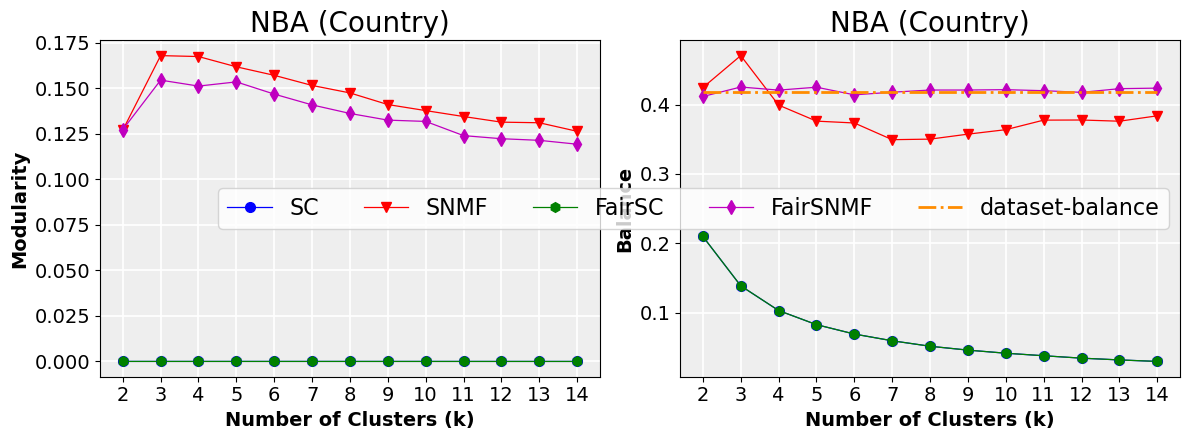

In [248]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("NBA (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
plt.legend(loc="best", ncol=5, fontsize=16)

plt.savefig("4_legend.svg", format='svg')
plt.show()

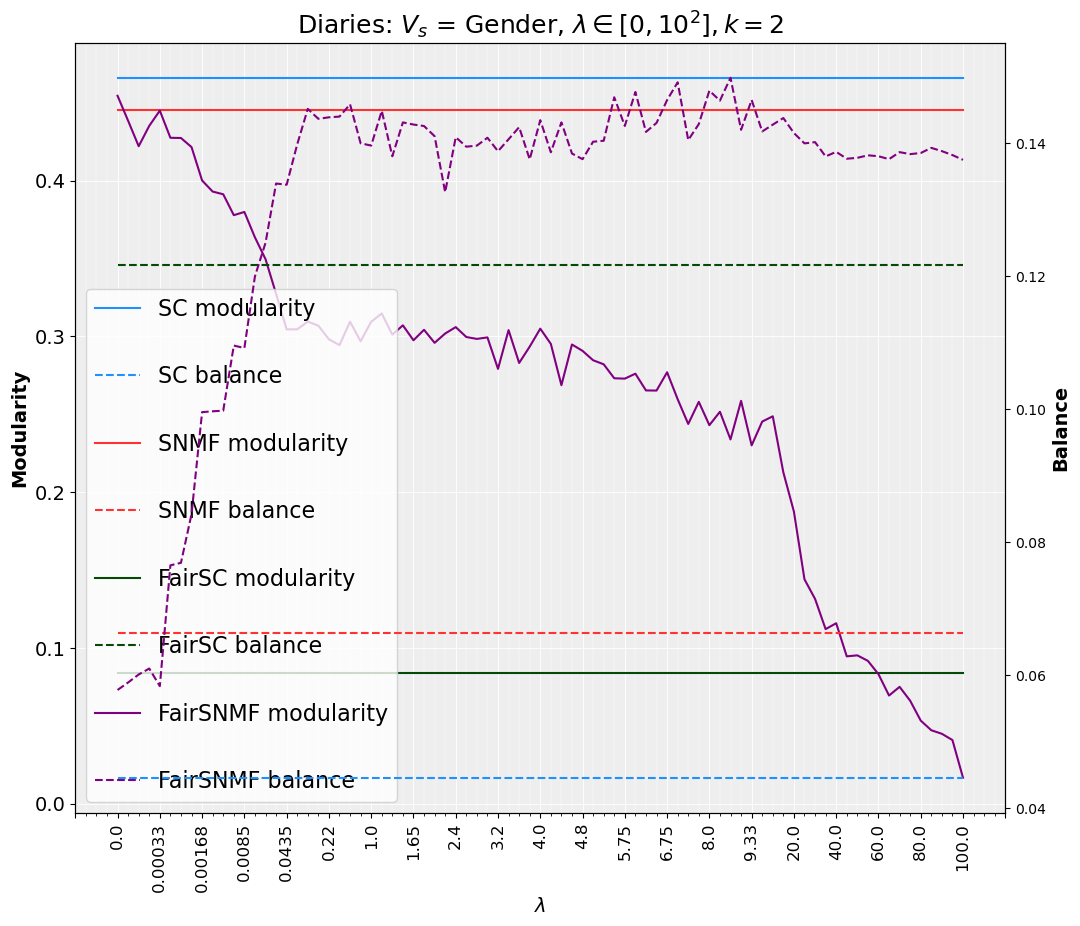

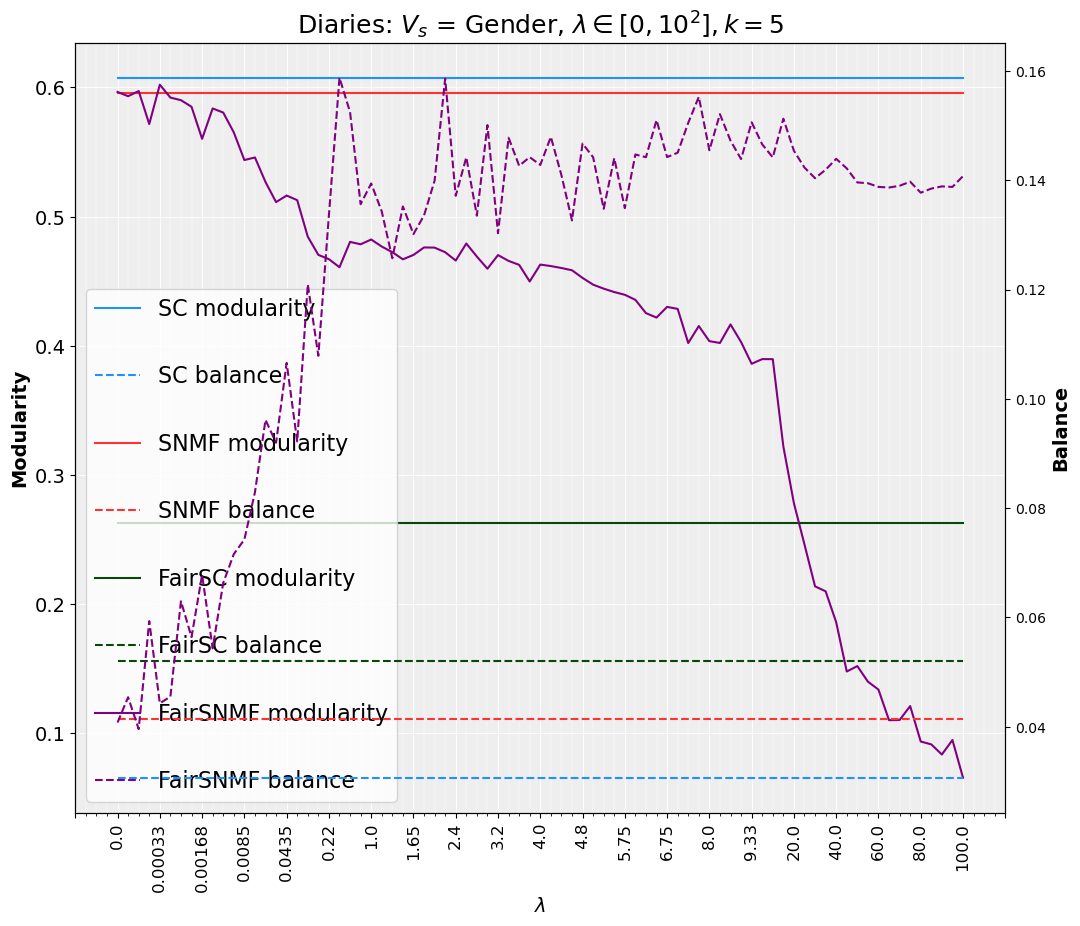

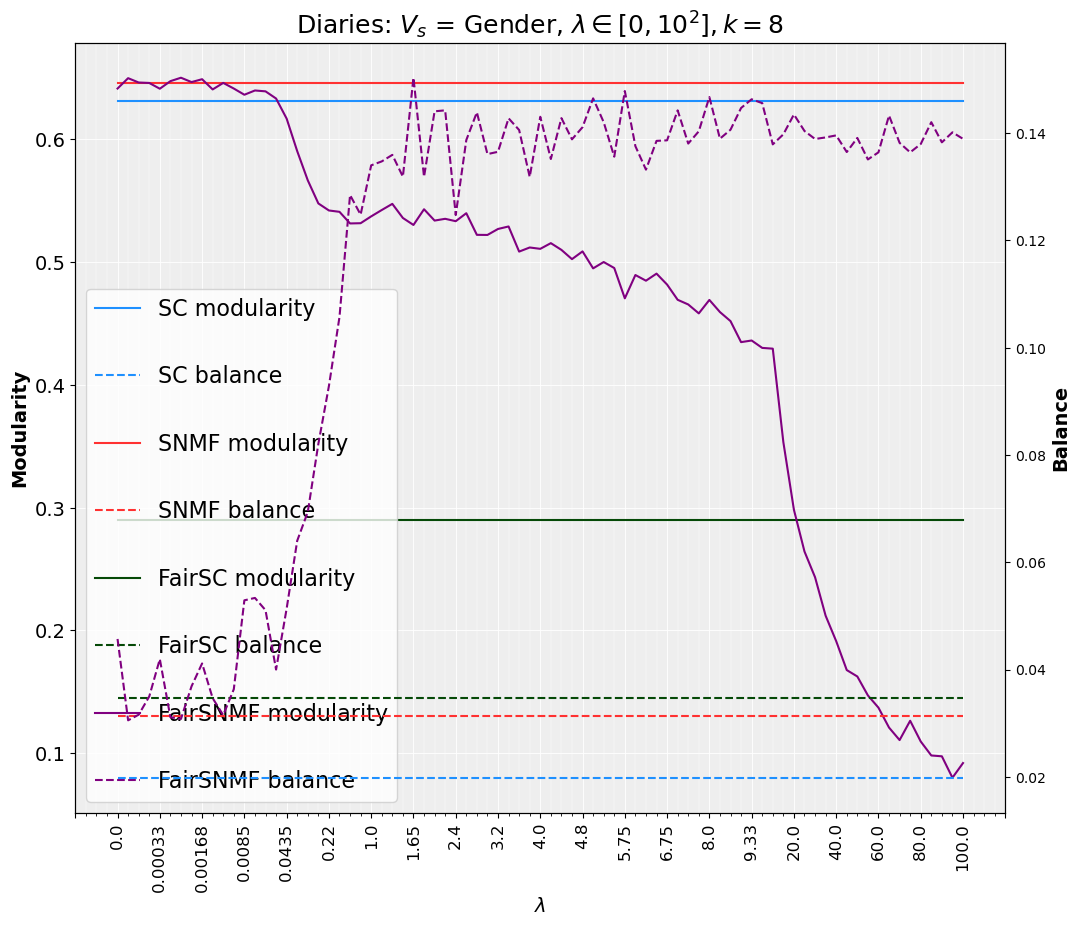

In [505]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(12, 10))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Diaries: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=1.5, c = "#FF3131")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=1.5, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=1.5, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#FF3131")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 12)

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p5+p2+p6+p3+p7+p4+p8
    labels = [l.get_label() for l in plots]
    #ll = [labels[0],labels[4],labels[1],labels[5],labels[2],labels[6],labels[3],labels[7]]
    axis.legend(plots, labels, loc="best", ncol=1, fontsize=16, labelspacing = 2)
    plt.savefig("legend_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

# Convergence charts 

In [330]:
from utils import *
from evaluations import *
import torch
import numpy as np
import matplotlib as mpl

eps = torch.tensor(0.000001)

## 1) NBA

In [397]:
#path = "data/LastFM/"
#A = sio.loadmat(path+'LastFM.mat')['A'].toarray()
#F0 = sio.loadmat(path+'LastFM.mat')['F'].flatten()
#F =np.unique(F0, return_inverse=True)[1]

path1 = "data/NBA/"
A = (pd.read_csv(path1 + "NBAgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "NBAfeature.csv", header=None)).to_numpy()

k = 5
lambdas = [1,10]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
F_country = compute_F(groups)
F1 = torch.tensor(F_country, dtype=torch.float)
FF = F1 @ F1.T

n = A.shape[0]

err_nba = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):
    iter = 100
    # Fair_NMF
    H = torch.rand(n, k, dtype=torch.float)  # the membership degree matrix (H) initialization
    FFp = (torch.abs(FF) + FF) / 2
    FFn = (torch.abs(FF) - FF) / 2
    
    for t in range(iter):
        Hu = Adj @ H + (lam / 2) * (FFn @ H)
        Hd = H @ H.T @ H + (lam / 2) * (FFp @ H)
        H = H * (Hu / torch.maximum(Hd, eps)) ** 0.25
        err_nba[idx][t] = torch.norm(Adj - H @ H.T) ** 2 + lam * torch.norm(F1.T @ H) ** 2

## 2) Drugnet

In [398]:
path1 = "data/DrugNet/CSV/"
path2 = "results/New/DrugNet/"

A0 = np.genfromtxt(path1+'DRUGNET.csv',delimiter=',')[1:, 1:]
A0 = np.maximum(A0, A0.T) # transform to undirected net
F0 = np.genfromtxt(path1+'DRUGATTR.csv',delimiter=',').astype(np.int64)[1:, 1:]

s = np.sum(A0, axis=1) + np.sum(A0, axis=0)
nze = np.where(s!=0)[0]

A = A0[nze,:]
A = A[:,nze]

# identify unlinked nodes
sm = np.array([105,151,51,135,145,147,35,176,181,158,166,114,117,11,73,98,120,126,192])
nn = A.shape[0]
F = F0[nze,:]
inter = np.setdiff1d(np.arange(nn), sm)

# exclude unlinked nodes out of network
A = A[inter,:]
A = A[:,inter]
F = F[inter,:]

# according to the ICML paper, ethnicity is categorized to three groups. We keep groups 2,3 and put 1,5,6,7 to another
# category according to: https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/drugnet
F_new = copy.deepcopy(F)
F_new[(F[:,0] <2) | (F[:,0]> 3), 0] = 1

k = 5
lambdas = [1,10]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F_new[:,0])
groups = np.transpose(standard_groups)
F_ethnicity = compute_F(groups)
F1 = torch.tensor(F_ethnicity, dtype=torch.float)
FF = F1 @ F1.T

n = A.shape[0]

err_drug = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):
    iter = 100
    # Fair_NMF
    H = torch.rand(n, k, dtype=torch.float)  # the membership degree matrix (H) initialization
    FFp = (torch.abs(FF) + FF) / 2
    FFn = (torch.abs(FF) - FF) / 2
    
    for t in range(iter):
        Hu = Adj @ H + (lam / 2) * (FFn @ H)
        Hd = H @ H.T @ H + (lam / 2) * (FFp @ H)
        H = H * (Hu / torch.maximum(Hd, eps)) ** 0.25
        err_drug[idx][t] = torch.norm(Adj - H @ H.T) ** 2 + lam * torch.norm(F1.T @ H) ** 2

## 3) plot both

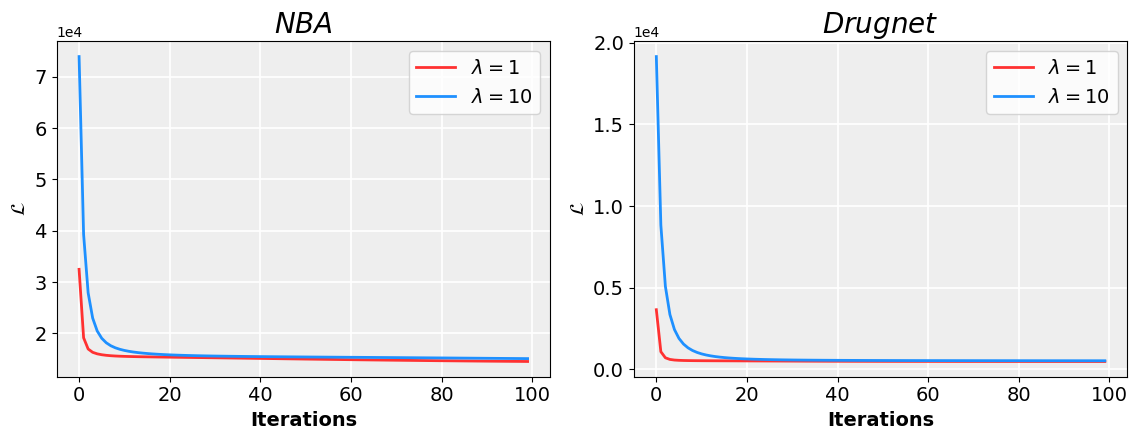

In [431]:
mpl.rcParams.update(mpl.rcParamsDefault)
figure, [ax1,ax2] = plt.subplots(1, 2, figsize=(12, 4.5))

ax1.plot(np.arange(iter), err_nba[0,:], label=r'$\lambda=1$', linewidth=2, c = "#FF3131")
ax1.plot(np.arange(iter), err_nba[1,:], label=r'$\lambda=10$', linewidth=2, c = "dodgerblue")

ax2.plot(np.arange(iter), err_drug[0,:], label=r'$\lambda=1$', linewidth=2, c = "#FF3131")
ax2.plot(np.arange(iter), err_drug[1,:], label=r'$\lambda=10$', linewidth=2, c = "dodgerblue")


#axis[i].set_xticks(k)
ax1.set_xlabel("Iterations", fontsize=14, fontweight='bold')
ax2.set_xlabel("Iterations", fontsize=14, fontweight='bold')

ax1.set_ylabel(r"$\mathcal{L}$", fontsize=14, fontweight='bold')
ax2.set_ylabel(r"$\mathcal{L}$", fontsize=14, fontweight='bold')

ax1.set_facecolor('#EEEEEE') #EBEBEB
ax2.set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid. # Give plot a gray background like ggplot.
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax2.grid(which='major', color='white', linewidth=1.2)
ax2.grid(which='minor', color='white', linewidth=0.6)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
    

#ax1.set_title("LastFM", fontsize=20)
#ax2.set_title("Facebook", fontsize=20)
ax1.set_title(r"$NBA$", fontsize=20)
ax2.set_title(r"$Drugnet$", fontsize=20)
    

figure.tight_layout()
ax1.legend(loc="best", fontsize=14)
ax2.legend(loc="best", fontsize=14)

ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.subplots_adjust( wspace=0.17)

plt.savefig("convergence_100.svg", format='svg')
plt.show()

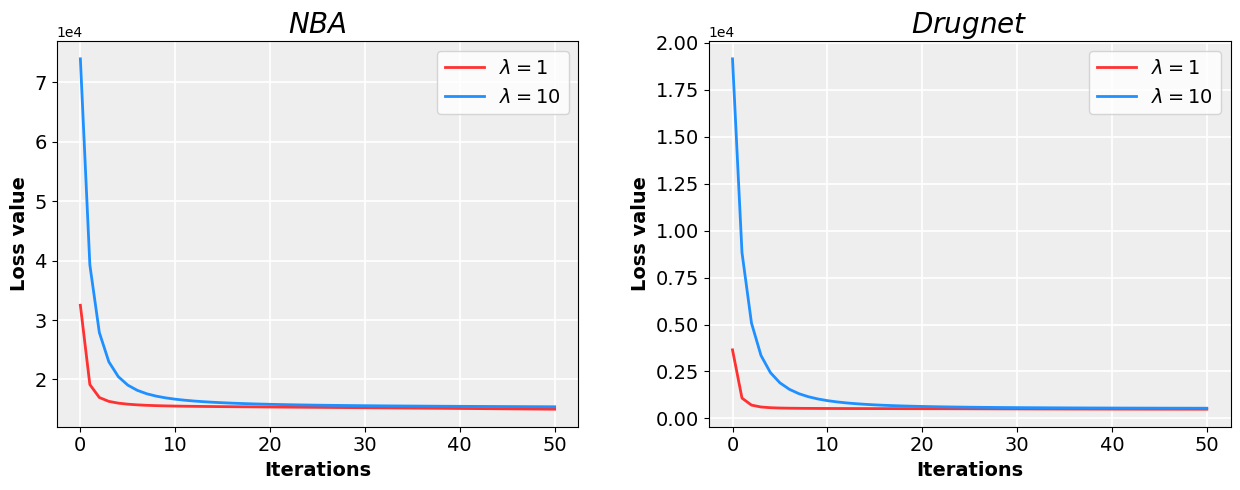

In [489]:
mpl.rcParams.update(mpl.rcParamsDefault)
figure, [ax1,ax2] = plt.subplots(1, 2, figsize=(13,5))

ax1.plot(np.arange(51), err_nba[0,:51], label=r'$\lambda=1$', linewidth=2, c = "#FF3131")
ax1.plot(np.arange(51), err_nba[1,:51], label=r'$\lambda=10$', linewidth=2, c = "dodgerblue")

ax2.plot(np.arange(51), err_drug[0,:51], label=r'$\lambda=1$', linewidth=2, c = "#FF3131")
ax2.plot(np.arange(51), err_drug[1,:51], label=r'$\lambda=10$', linewidth=2, c = "dodgerblue")


#axis[i].set_xticks(k)
ax1.set_xlabel("Iterations", fontsize=14, fontweight='bold')
ax2.set_xlabel("Iterations", fontsize=14, fontweight='bold')

ax1.set_ylabel(r"Loss value", fontsize=14, fontweight='bold')
ax2.set_ylabel(r"Loss value", fontsize=14, fontweight='bold')

ax1.set_facecolor('#EEEEEE') #EBEBEB
ax2.set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid. # Give plot a gray background like ggplot.
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax2.grid(which='major', color='white', linewidth=1.2)
ax2.grid(which='minor', color='white', linewidth=0.6)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
    

#ax1.set_title("LastFM", fontsize=20)
#ax2.set_title("Facebook", fontsize=20)
ax1.set_title(r"$NBA$", fontsize=20)
ax2.set_title(r"$Drugnet$", fontsize=20)
    

figure.tight_layout()
ax1.legend(loc="best", fontsize=14)
ax2.legend(loc="best", fontsize=14)

ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.subplots_adjust( wspace=0.25)

plt.savefig("convergence_50.svg", format='svg')
plt.show()

In [440]:
mpl.rcParams.update(mpl.rcParamsDefault)

# 9) Synthetic
## Table $h=2, k=2$

In [534]:
path2 = "results/New/SBM/"
comp_sbm = pd.read_csv(path2 + "SBM_1_k_n_gridsearch.csv")
fnmf_1_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_1_k_lam_gridsearch.csv")
fnmf_10_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_10_k_lam_gridsearch.csv")

comp_perturb_sbm = pd.read_csv(path2 + "SBM_1_perturb_k_n_gridsearch.csv")
fnmf_1_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_1_perturb_k_lam_gridsearch.csv")
fnmf_10_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_10_perturb_k_lam_gridsearch.csv")

In [535]:
# SBM
fnmf_acc_1 = fnmf_1_sbm['accurcay'].values
fnmf_acc_10 = fnmf_10_sbm['accurcay'].values
fnmf_bal_1 = fnmf_1_sbm['average balance'].values
fnmf_bal_10 = fnmf_10_sbm['average balance'].values

fsc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["average balance"].values)


# SBM Perturb
fnmf_acc_1_p = fnmf_1_perturb_sbm['accurcay'].values
fnmf_acc_10_p = fnmf_10_perturb_sbm['accurcay'].values
fnmf_bal_1_p = fnmf_1_perturb_sbm['average balance'].values
fnmf_bal_10_p = fnmf_10_perturb_sbm['average balance'].values

fsc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["average balance"].values)

In [536]:
col1 = ["SBM n=2k","SBM n=5k","SBM n=10k"]
col2 = ["SBM n=2k; p=0.3","SBM n=5k; p=0.3","SBM n=10k; p=0.3"]

results = dict()
results = {'Network':col1, r'$B$-SC':sc_bal_sbm, r'$Acc$-SC':sc_acc_sbm, r'$B$-FSC':fsc_bal_sbm, r'$Acc$-FSC':fsc_acc_sbm,
           r'$B$-SNMF':nmf_bal_sbm, r'$Acc$-SNMF':nmf_acc_sbm, r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1, 
           r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1, r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10, 
           r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10}


results_prtrb = dict()
results_prtrb = {'Network':col2, r'$B$-SC':sc_bal_sbm_p, r'$Acc$-SC':sc_acc_sbm_p, r'$B$-FSC':fsc_bal_sbm_p,
                 r'$Acc$-FSC':fsc_acc_sbm_p, r'$B$-SNMF':nmf_bal_sbm_p, r'$Acc$-SNMF':nmf_acc_sbm_p, 
                 r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1_p, r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1_p,
                 r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10_p, r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10_p}

df = pd.DataFrame((results))
df_prtrb = pd.DataFrame((results_prtrb))
display(df)
display(df_prtrb)

Network    $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  $Acc$-SNMF  \
0   SBM n=2k  0.066667    0.2030  0.466667     0.2045  0.104110      0.4070   
1   SBM n=5k  0.000000    0.2006  0.199840     0.2008  0.000000      0.4610   
2  SBM n=10k  0.000000    0.2002  0.199920     0.2003  0.011905      0.4321   

   $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0                  0.941416                      0.8190   
1                  0.978457                      0.8100   
2                  0.983079                      0.5537   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.900923                       0.3010  
1                   0.966282                       0.2294  
2                   0.953729                       0.2231

Network    $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  \
0   SBM n=2k; p=0.3  0.085551    0.2010  0.139940     0.2055  0.171692   
1   SBM n=5k; p=0.3  0.085600    0.2006  0.140112     0.2014  0.255113   
2  SBM n=10k; p=0.3  0.085763    0.2003  0.139948     0.2050  0.205340   

   $Acc$-SNMF  $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0      0.4455                  0.542340                      0.7065   
1      0.4486                  0.500191                      0.4970   
2      0.3803                  0.559850                      0.4273   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.431453                       0.2565  
1                   0.571885                       0.2352  
2                   0.539555                       0.2371

## Table $h=5, k=5$

In [11]:
path2 = "results/New/SBM/"
comp_sbm = pd.read_csv(path2 + "SBM_l1_h5_k5_n_gridsearch.csv")
fnmf_1_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_l1_h5_k5_n_gridsearch.csv")
fnmf_10_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_l10_h5_k5_n_gridsearch.csv")

comp_perturb_sbm = pd.read_csv(path2 + "SBM_l1_h5_k5_n_perturb.csv")
fnmf_1_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_l1_h5_k5_n_perturb.csv")
fnmf_10_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_l10_h5_k5_n_perturb.csv")


# SBM
fnmf_acc_1 = fnmf_1_sbm['accurcay'].values
fnmf_acc_10 = fnmf_10_sbm['accurcay'].values
fnmf_bal_1 = fnmf_1_sbm['average balance'].values
fnmf_bal_10 = fnmf_10_sbm['average balance'].values

fsc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm  = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm  = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["average balance"].values)


# SBM Perturb
fnmf_acc_1_p = fnmf_1_perturb_sbm['accurcay'].values
fnmf_acc_10_p = fnmf_10_perturb_sbm['accurcay'].values
fnmf_bal_1_p = fnmf_1_perturb_sbm['average balance'].values
fnmf_bal_10_p = fnmf_10_perturb_sbm['average balance'].values

fsc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["average balance"].values)


In [14]:
col1 = ["SBM n=2k","SBM n=5k","SBM n=10k"]
col2 = ["SBM n=2k; p=0.3","SBM n=5k; p=0.3","SBM n=10k; p=0.3"]

results = dict()
results = {'Network':col1, r'$B$-SC':sc_bal_sbm, r'$Acc$-SC':sc_acc_sbm, r'$B$-FSC':fsc_bal_sbm, r'$Acc$-FSC':fsc_acc_sbm,
           r'$B$-SNMF':nmf_bal_sbm, r'$Acc$-SNMF':nmf_acc_sbm, r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1, 
           r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1, r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10, 
           r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10}


results_prtrb = dict()
results_prtrb = {'Network':col2, r'$B$-SC':sc_bal_sbm_p, r'$Acc$-SC':sc_acc_sbm_p, r'$B$-FSC':fsc_bal_sbm_p,
                 r'$Acc$-FSC':fsc_acc_sbm_p, r'$B$-SNMF':nmf_bal_sbm_p, r'$Acc$-SNMF':nmf_acc_sbm_p, 
                 r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1_p, r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1_p,
                 r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10_p, r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10_p}

df = pd.DataFrame((results))
df_prtrb = pd.DataFrame((results_prtrb))
display(df)
display(df_prtrb)

Network  $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  $Acc$-SNMF  \
0   SBM n=2k     0.0       0.2  0.575655     0.5880       0.0         0.2   
1   SBM n=5k     0.0       0.2  0.995010     0.9984       0.0         0.2   
2  SBM n=10k     0.0       0.2  1.000000     1.0000       0.0         0.2   

   $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0                  0.995031                      0.9995   
1                  0.996010                      0.9996   
2                  0.990547                      0.9967   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.990093                       0.9990  
1                   0.978193                       0.9870  
2                   0.990564                       0.9965

Network  $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  \
0   SBM n=2k; p=0.3     0.0       0.2  0.216982     0.3995       0.0   
1   SBM n=5k; p=0.3     0.0       0.2  0.210757     0.3976       0.0   
2  SBM n=10k; p=0.3     0.0       0.2  0.538612     1.0000       0.0   

   $Acc$-SNMF  $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0         0.2                  0.425197                      0.7235   
1         0.2                  0.510489                      0.7416   
2         0.2                  0.539900                      0.9470   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.496913                       0.8795  
1                   0.536408                       0.7868  
2                   0.538932                       0.9830

In [509]:
fnmf_1_sbm['accurcay'].values

array([0.819 , 0.81  , 0.5537])

In [510]:
(comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)

array([0.2025, 0.2004, 0.3974])